## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Supervised_Learning_Foundation/used_device_data.csv')
df.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_used_price  normalized_new_price  
0        127               4.307572              4.715100  
1        325               5.162097              5.519018  
2        162               5.111084              5.884631  
3        345               5.135387              5.630961  
4        293               4.389995              4.947837

## Data Overview

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
# returns the first 5 rows
df.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_used_price  normalized_new_price  
0        127               4.307572              4.715100  
1        325               5.162097              5.519018  
2        162               5.111084              5.884631  
3        345               5.135387              5.630961  
4        293               4.389995              4.947837

In [ ]:
# returns the last 5 rows
df.tail()

brand_name       os  screen_size   4g  5g  main_camera_mp  \
3449       Asus  Android        15.34  yes  no             NaN   
3450       Asus  Android        15.24  yes  no            13.0   
3451    Alcatel  Android        15.80  yes  no            13.0   
3452    Alcatel  Android        15.80  yes  no            13.0   
3453    Alcatel  Android        12.83  yes  no            13.0   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
3449               8.0        64.0  6.0   5000.0   190.0          2019   
3450               8.0       128.0  8.0   4000.0   200.0          2018   
3451               5.0        32.0  3.0   4000.0   165.0          2020   
3452               5.0        32.0  2.0   4000.0   160.0          2020   
3453               5.0        16.0  2.0   4000.0   168.0          2020   

      days_used  normalized_used_price  normalized_new_price  
3449        232               4.492337              6.483872  
3450        541               5.037732              6.251538  
3451        201               4.357350              4.528829  
3452        149               4.349762              4.624188  
3453        176               4.132122              4.279994

In [ ]:
#shape of the data
df.shape

(3454, 15)

There are 3454 rows and 15 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [ ]:
#statistical summary for the numeric data
df.describe(include='all').T

count unique      top  freq         mean          std  \
brand_name               3454     34   Others   502          NaN          NaN   
os                       3454      4  Android  3214          NaN          NaN   
screen_size            3454.0    NaN      NaN   NaN    13.713115      3.80528   
4g                       3454      2      yes  2335          NaN          NaN   
5g                       3454      2       no  3302          NaN          NaN   
main_camera_mp         3275.0    NaN      NaN   NaN     9.460208     4.815461   
selfie_camera_mp       3452.0    NaN      NaN   NaN     6.554229     6.970372   
int_memory             3450.0    NaN      NaN   NaN    54.573099    84.972371   
ram                    3450.0    NaN      NaN   NaN     4.036122     1.365105   
battery                3448.0    NaN      NaN   NaN  3133.402697  1299.682844   
weight                 3447.0    NaN      NaN   NaN   182.751871    88.413228   
release_year           3454.0    NaN      NaN   NaN  2015.965258     2.298455   
days_used              3454.0    NaN      NaN   NaN   674.869716   248.580166   
normalized_used_price  3454.0    NaN      NaN   NaN     4.364712     0.588914   
normalized_new_price   3454.0    NaN      NaN   NaN     5.233107     0.683637   

                            min       25%       50%       75%       max  
brand_name                  NaN       NaN       NaN       NaN       NaN  
os                          NaN       NaN       NaN       NaN       NaN  
screen_size                5.08      12.7     12.83     15.34     30.71  
4g                          NaN       NaN       NaN       NaN       NaN  
5g                          NaN       NaN       NaN       NaN       NaN  
main_camera_mp             0.08       5.0       8.0      13.0      48.0  
selfie_camera_mp            0.0       2.0       5.0       8.0      32.0  
int_memory                 0.01      16.0      32.0      64.0    1024.0  
ram                        0.02       4.0       4.0       4.0      12.0  
battery                   500.0    2100.0    3000.0    4000.0    9720.0  
weight                     69.0     142.0     160.0     185.0     855.0  
release_year             2013.0    2014.0    2015.5    2018.0    2020.0  
days_used                  91.0     533.5     690.5    868.75    1094.0  
normalized_used_price  1.536867  4.033931  4.405133    4.7557  6.619433  
normalized_new_price   2.901422  4.790342  5.245892  5.673718  7.847841

Observations:

* There are 34 brands of refurbished phones available.
* Among all the phones, Android OS is the most popular OS available comprising of 93%.
* There are alot of 4g phones available for second purchase than the 5g ones.
* On an average people tend to use their phones for 2 years approximately(mean of number of days is 675)
* As with the generally known fact that the mean of normalized used price is lesser than the mean of normalized new price. That is, New phones always cost higher than the old ones!

In [ ]:
#Check for missing values
df.isna().sum().sort_values(ascending=False)

main_camera_mp           179
weight                     7
battery                    6
int_memory                 4
ram                        4
selfie_camera_mp           2
brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

Observation: There are alot of missing values in main camera mega pixel, Will do a detailed analysis in a bit.

In [ ]:
#check for duplicates
df.duplicated().sum()

0

Observation: There are no duplicate data found in the dataset.

## Exploratory Data Analysis (EDA)

###Univariate Analysis

#### Brand Name

In [ ]:
df['brand_name'].value_counts(normalize=True).sort_values(ascending=False)

Others        0.145339
Samsung       0.098726
Huawei        0.072669
LG            0.058193
Lenovo        0.049508
ZTE           0.040533
Xiaomi        0.038217
Oppo          0.037348
Asus          0.035321
Alcatel       0.035032
Micromax      0.033874
Vivo          0.033874
Honor         0.033584
HTC           0.031847
Nokia         0.030689
Motorola      0.030689
Sony          0.024899
Meizu         0.017950
Gionee        0.016213
Acer          0.014765
XOLO          0.014186
Panasonic     0.013607
Realme        0.011870
Apple         0.011291
Lava          0.010423
Celkon        0.009554
Spice         0.008686
Karbonn       0.008396
Coolpad       0.006369
BlackBerry    0.006369
Microsoft     0.006369
OnePlus       0.006369
Google        0.004343
Infinix       0.002895
Name: brand_name, dtype: float64

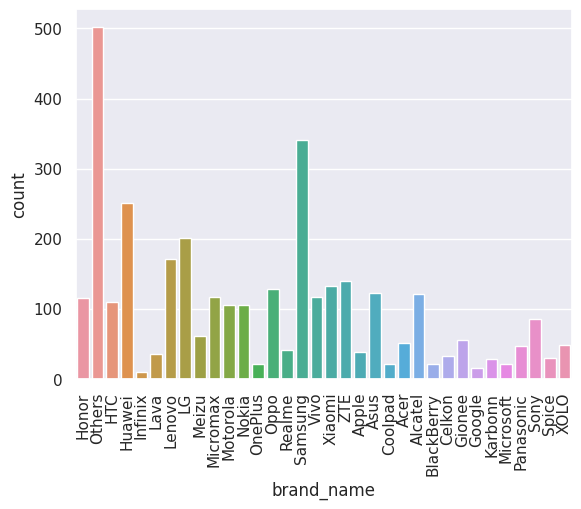

In [ ]:
sns.countplot(data=df, x= 'brand_name')
plt.xticks(rotation=90)
plt.show();

Observation: Top 5 Brands are Samsung, Huawei, LG, Lenovo, ZTE.

#### OS

In [ ]:
df['os'].value_counts(normalize=True)

Android    0.930515
Others     0.039664
Windows    0.019398
iOS        0.010423
Name: os, dtype: float64

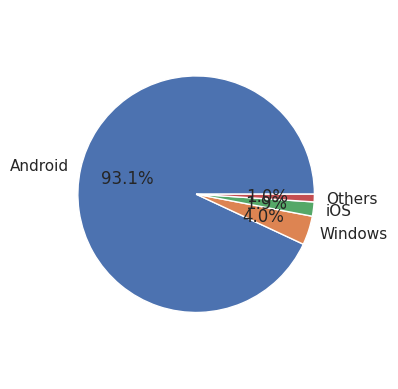

In [ ]:
# Pie chart
labels = ['Android', 'Windows', 'iOS','Others']
plt.pie(df['os'].value_counts(), autopct = '%.1f%%', radius = 0.8,
        labels = labels)
plt.show()

Observation: Android OS comprises of 93% of the operating system in refurbished phones.

#### ScreenSize

In [ ]:
#Most of the screen size is measured in inches, so lets convert the values from cm to inches
df['screen_size']=df['screen_size']*0.394
df['screen_size'].mean()

5.4029674001158075

In [ ]:
df['screen_size'].describe()

count    3454.000000
mean        5.402967
std         1.499280
min         2.001520
25%         5.003800
50%         5.055020
75%         6.043960
max        12.099740
Name: screen_size, dtype: float64

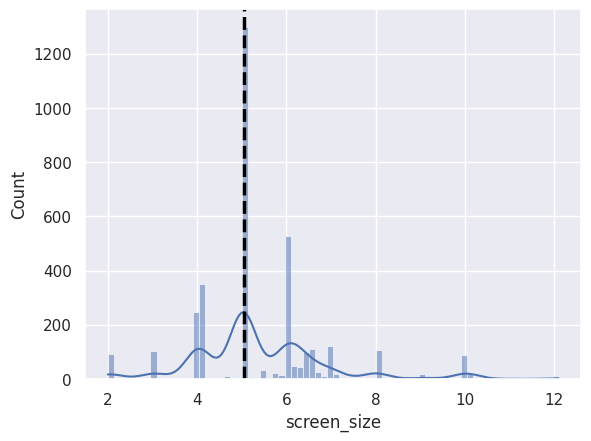

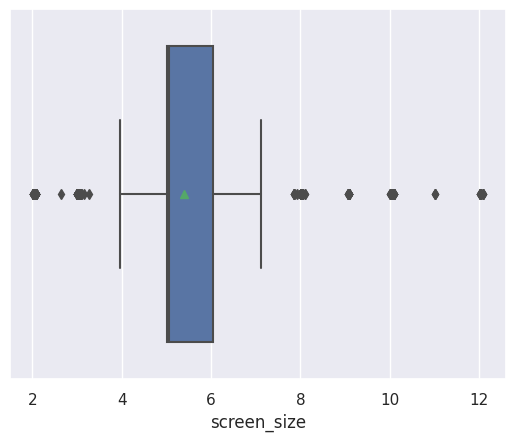

In [ ]:
sns.histplot(data=df,x='screen_size', kde=True)
plt.axvline(x=df.screen_size.median(),color='black',ls='--',lw=2.5)
plt.show()
sns.boxplot(data=df,x='screen_size',showmeans=True)
plt.show()

Observation: The distribution of screen size of the devices is approximately normal. Average screen size is  5.40 inches and there are alot of outliers in the data. Also we can see from the histogram that there are multi modes.

####4g

In [ ]:
df['4g'].value_counts(normalize=True).sort_values(ascending=False)

yes    0.676028
no     0.323972
Name: 4g, dtype: float64

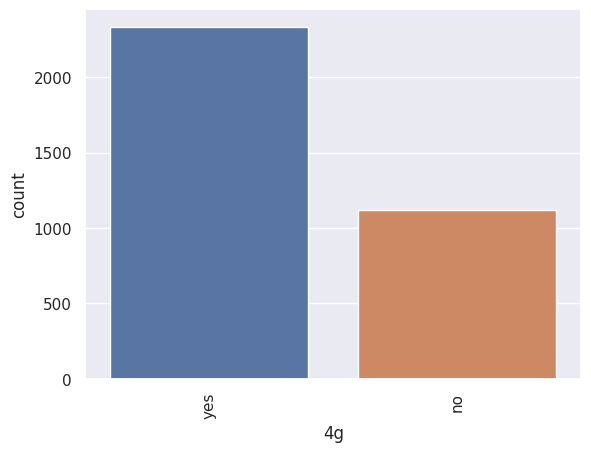

In [ ]:
sns.countplot(data=df, x= '4g')
plt.xticks(rotation=90)
plt.show();

Observation: Around 68% of used phones are 4g.

#### 5g

In [ ]:
df['5g'].value_counts(normalize=True).sort_values(ascending=False)

no     0.955993
yes    0.044007
Name: 5g, dtype: float64

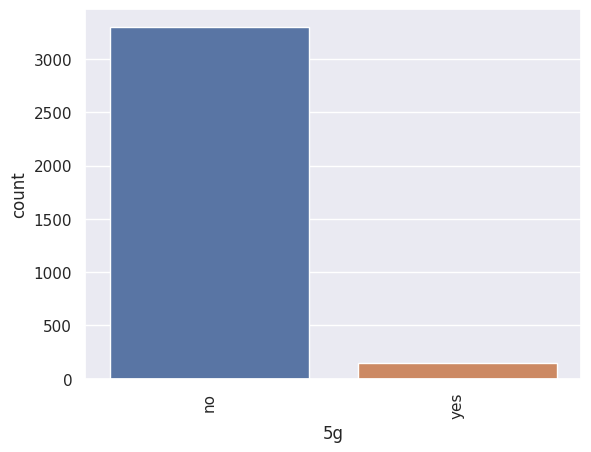

In [ ]:
sns.countplot(data=df, x= '5g')
plt.xticks(rotation=90)
plt.show();

Observation: Only 5% of available refurbished phones are 5g.

#### Main Camera Mp

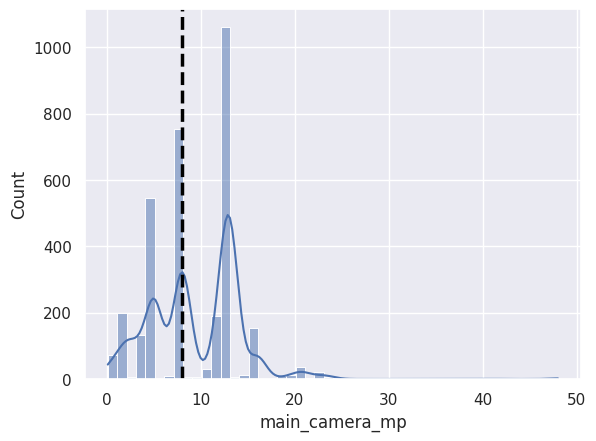

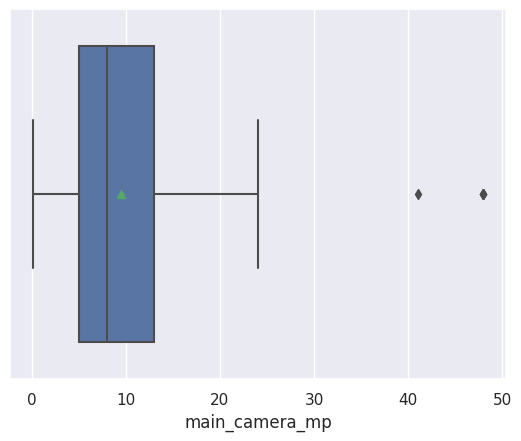

In [ ]:
sns.histplot(data=df,x='main_camera_mp', binwidth=1, stat="count",kde=True)
plt.axvline(x=df.main_camera_mp.median(),color='black',ls='--',lw=2.5)
plt.show()
sns.boxplot(data=df,x='main_camera_mp',showmeans=True)
plt.show()

In [ ]:
df[df['main_camera_mp'] > 40]

brand_name       os  screen_size   4g  5g  main_camera_mp  \
210         ZTE  Android      6.65466  yes  no            48.0   
215         ZTE  Android      6.65466  yes  no            48.0   
2097      Nokia  Windows      4.05426  yes  no            41.0   
3240   Motorola  Android      6.04396  yes  no            48.0   
3381   Motorola  Android      6.04396  yes  no            48.0   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
210               16.0       128.0  8.0   5000.0   215.0          2019   
215               16.0        64.0  6.0   5000.0   215.0          2019   
2097               1.2        32.0  4.0   2000.0   158.0          2013   
3240              25.0       128.0  4.0   3600.0   165.0          2019   
3381              25.0       128.0  4.0   3600.0   165.0          2019   

      days_used  normalized_used_price  normalized_new_price  
210         336               5.668052              6.708780  
215         506               5.263726              6.217723  
2097        988               5.105097              5.989287  
3240        371               5.325933              5.541224  
3381        422               5.331027              5.541224

In [ ]:
df[(df['release_year']==2013) & (df['brand_name']=='Nokia')]

brand_name       os  screen_size   4g  5g  main_camera_mp  \
2086      Nokia  Windows      4.00304   no  no            5.00   
2087      Nokia  Windows      6.00456  yes  no           20.00   
2088      Nokia  Windows      6.00456  yes  no            5.00   
2089      Nokia  Windows     10.01942  yes  no            6.70   
2090      Nokia   Others      3.00228   no  no            5.00   
2091      Nokia   Others      3.00228   no  no            5.00   
2092      Nokia   Others      3.00228   no  no            5.00   
2093      Nokia   Others      2.08032   no  no            2.00   
2094      Nokia   Others      2.08032   no  no            2.00   
2095      Nokia   Others      2.04092   no  no            5.00   
2096      Nokia  Windows      4.07396  yes  no            5.00   
2097      Nokia  Windows      4.05426  yes  no           41.00   
2098      Nokia   Others      2.04092   no  no            1.30   
2099      Nokia   Others      2.04092   no  no            5.00   
2100      Nokia  Windows      4.05426  yes  no            8.00   
2101      Nokia  Windows      4.05426  yes  no            8.00   
2102      Nokia   Others      3.00228   no  no            3.15   
2103      Nokia   Others      2.04092   no  no            2.00   
2104      Nokia  Windows      4.03456   no  no            6.70   
2105      Nokia  Windows      4.00304   no  no            5.00   
2106      Nokia   Others      2.04092   no  no            3.15   
2107      Nokia   Others      3.00228   no  no            2.00   

      selfie_camera_mp  int_memory   ram  battery  weight  release_year  \
2086              1.25       32.00  4.00   1430.0   124.0          2013   
2087              1.20       16.00  4.00   3400.0   209.0          2013   
2088              0.30       32.00  4.00   3400.0   220.0          2013   
2089              2.00       32.00  4.00   1200.0   615.0          2013   
2090              0.00        0.06   NaN   1200.0   111.4          2013   
2091              0.00        0.10  0.03   1200.0   110.2          2013   
2092              0.00         NaN  0.02   1010.0   100.0          2013   
2093              0.00        0.06  0.03   1200.0   101.3          2013   
2094              0.00        0.06  0.03   1200.0   101.0          2013   
2095              0.00        0.06  0.03   1200.0   101.1          2013   
2096              0.30       32.00  4.00   2000.0   159.0          2013   
2097              1.20       32.00  4.00   2000.0   158.0          2013   
2098              0.00        0.06  0.02   1020.0    89.6          2013   
2099              0.00        0.10  0.03   1020.0    91.3          2013   
2100              1.30       16.00  4.00   2000.0   139.0          2013   
2101              1.30       32.00  4.00   2000.0   162.0          2013   
2102              0.00        0.06  0.02   1200.0    98.2          2013   
2103              0.00        0.10  0.03   1200.0    97.3          2013   
2104              1.30       32.00  4.00   2000.0   128.0          2013   
2105              1.25       32.00  4.00   1430.0   124.0          2013   
2106              0.00        0.10  0.02   1110.0   102.0          2013   
2107              0.00        0.10  0.02   1110.0   103.7          2013   

      days_used  normalized_used_price  normalized_new_price  
2086        721               3.516904              4.789490  
2087       1052               4.866380              5.861014  
2088        817               4.502916              5.345344  
2089       1067               4.978319              5.882431  
2090       1001               3.827771              4.605770  
2091        987               3.881358              4.517322  
2092       1043               3.535728              4.370586  
2093        893               3.418382              4.092510  
2094        782               3.292126              4.081766  
2095        863               4.391977              4.943284  
2096        797               4.053002              5.070726  
2097

Observation: The main camera pixels are kind of normally distributed. Most of the phones have main camera as 10 megapixels. Few of ZTE and Motorola phones have a very good main camera and seems to be genuine where as the Nokia phone listed with 41 Mp maybe a typing error.

#### Selfie Camera Mp

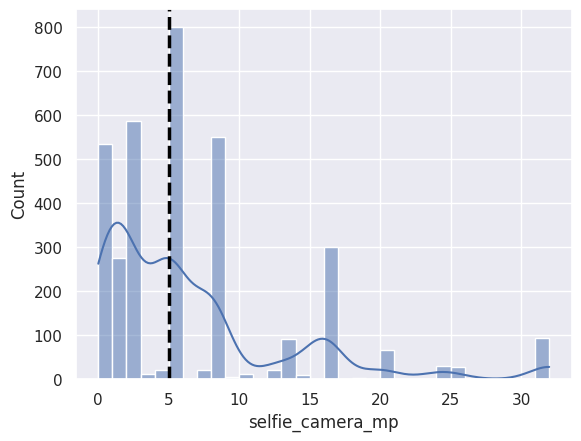

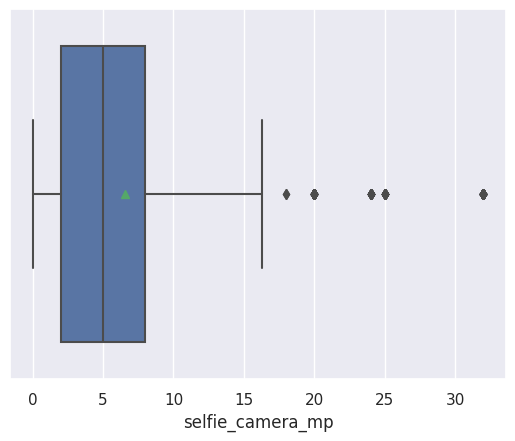

In [ ]:
sns.histplot(data=df,x='selfie_camera_mp', binwidth=1, stat="count",kde=True)
plt.axvline(x=df.selfie_camera_mp.median(),color='black',ls='--',lw=2.5)
plt.show()
sns.boxplot(data=df,x='selfie_camera_mp',showmeans=True)
plt.show()

In [ ]:
df[df['selfie_camera_mp']>15]['selfie_camera_mp'].unique()

array([16. , 32. , 24. , 20. , 25. , 18. , 16.3])

Observation: The distribution of selfie camera pixels of the devices is right skewed. The Selfie camera Mp has an average of 6.5 Mp and has a spread of 6.9 Standard deviation. The data has outliers and all the data seems to be genuine.

####Internal memory

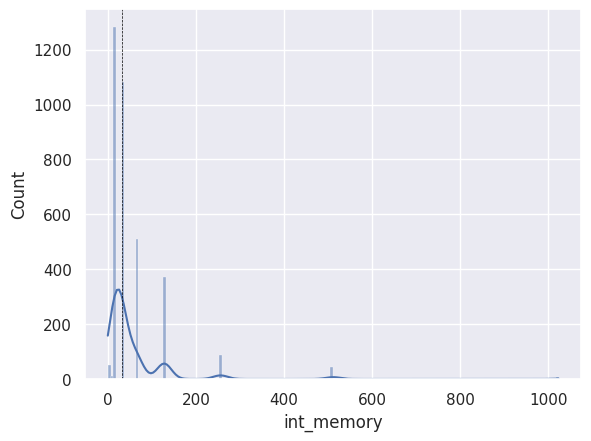

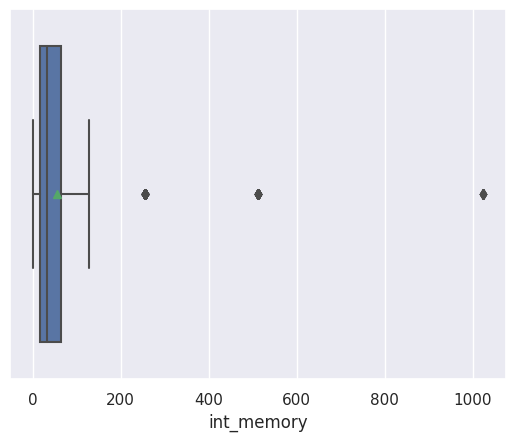

In [ ]:
sns.histplot(data=df,x='int_memory',kde=True)
plt.axvline(x=df.int_memory.median(),color='black',ls='--',lw=0.5)
plt.show()
sns.boxplot(data=df,x='int_memory',showmeans=True)
plt.show()

Observation: The distribution is a right skewed with right outliers. Internal memory of most of the used phones is 54.57GB and the values have a standard deviation is 84.97GB indicating the there is a wide spread in data with minimum of 0GB and maximum of 1024GB

#### RAM

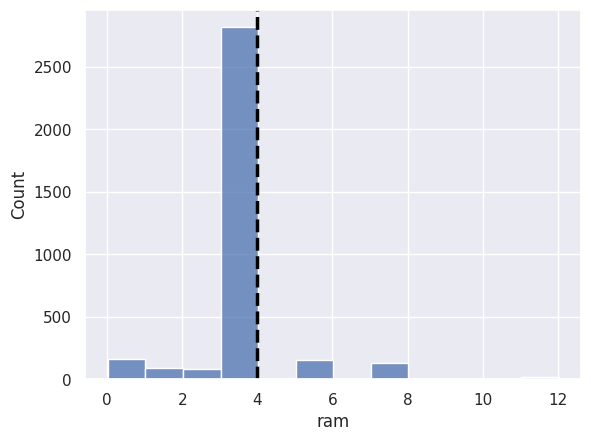

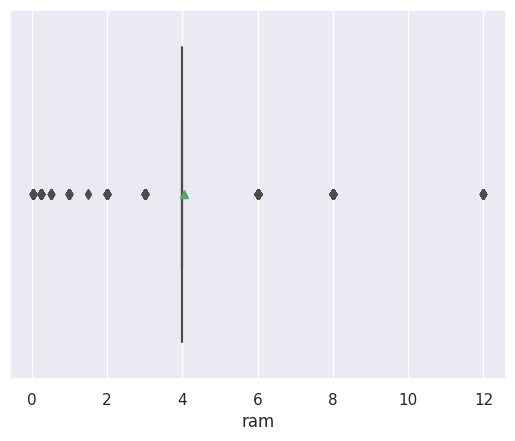

In [ ]:
sns.histplot(data=df,x='ram', binwidth=1, stat="count")
plt.axvline(x=df.ram.median(),color='black',ls='--',lw=2.5)
plt.show()
sns.boxplot(data=df,x='ram',showmeans=True)
plt.show()

In [ ]:
df['ram'].value_counts(normalize=True)

4.00     0.815942
6.00     0.044638
8.00     0.037681
2.00     0.026087
0.25     0.024058
3.00     0.023478
1.00     0.009855
12.00    0.005217
0.02     0.005217
0.03     0.004928
0.50     0.002609
1.50     0.000290
Name: ram, dtype: float64

Observation: Around 81% of the used phones have a ram of 4GB.

#### Battery

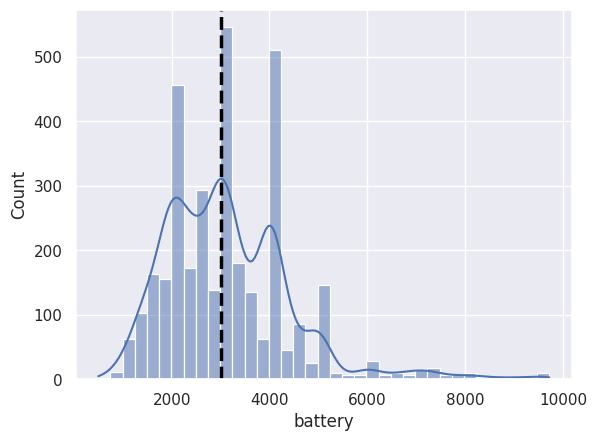

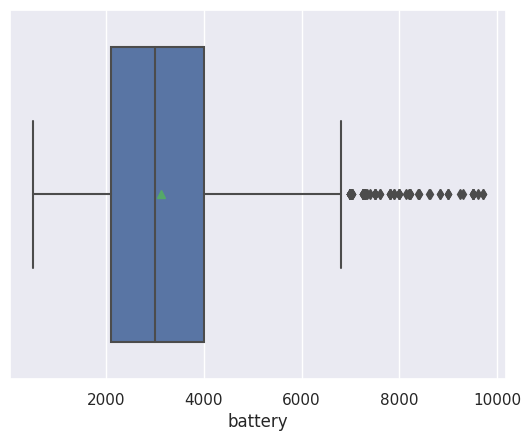

In [ ]:
sns.histplot(data=df,x='battery',kde=True)
plt.axvline(x=df.battery.median(),color='black',ls='--',lw=2.5)
plt.show()
sns.boxplot(data=df,x='battery',showmeans=True)
plt.show()

In [ ]:
df[df['battery']>6000].shape[0]

110

In [ ]:
df['battery'].mean()

3133.402697215777

Observation: Battery data is almost normally distributed right side outliers indicating right skewedness. Also, the distribution indicates multi modes in the data. On an average the used phones have a battery of 3133 mAh and phones with more than 6000 mAh is 3% of the available phones.

#### Weight

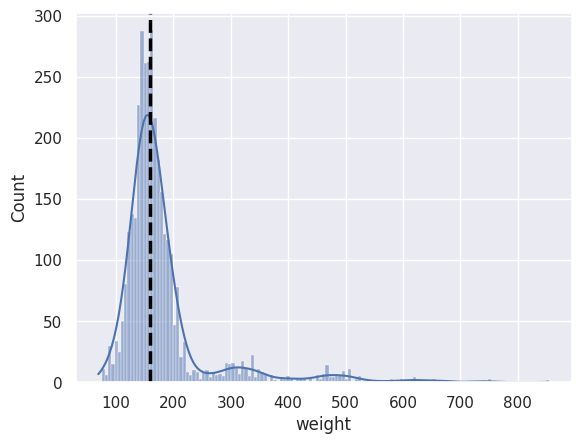

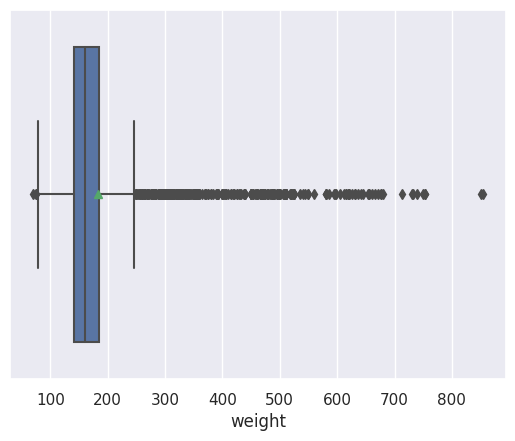

In [ ]:
sns.histplot(data=df,x='weight',kde=True)
plt.axvline(x=df.weight.median(),color='black',ls='--',lw=2.5)
plt.show()
sns.boxplot(data=df,x='weight',showmeans=True)
plt.show()

In [ ]:
df[df['weight']>250].weight.count()

359

Observation: Weight is heavily right skewed and has a mean around 183 grams. And around 10% of the used phones are little on the heavier side that is more than 250 grams.

#### Release Year

In [ ]:
df['release_year'].value_counts(normalize=True)

2014    0.185871
2013    0.165026
2015    0.149102
2019    0.129126
2016    0.110886
2018    0.093225
2017    0.086566
2020    0.080197
Name: release_year, dtype: float64

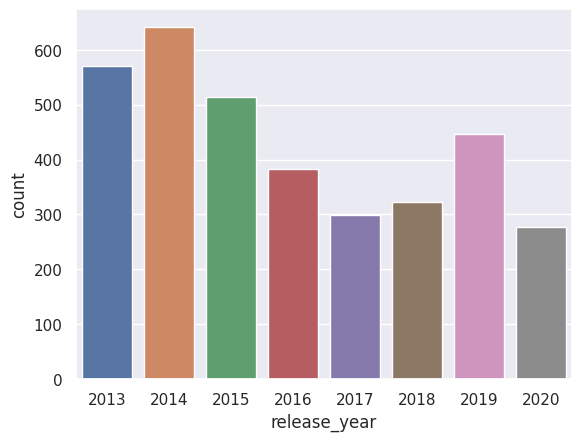

In [ ]:
sns.countplot(data=df,x='release_year');

Observation: Around 18% of the used phones are from 2014 followed by 16% from 2013 year.

#### Number of Days used

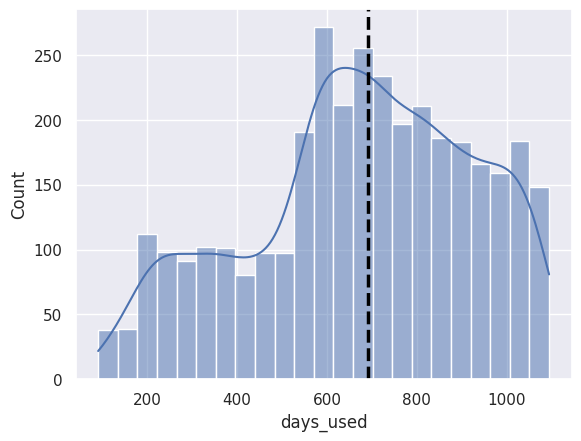

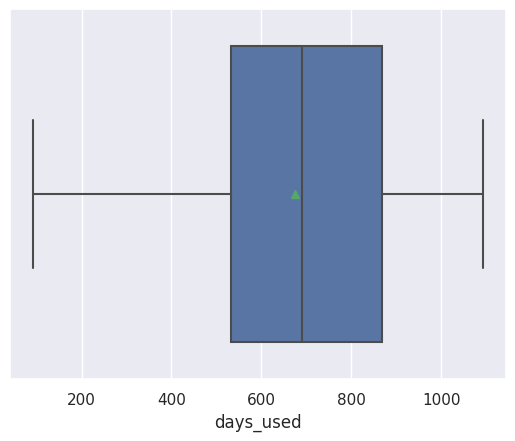

In [ ]:
sns.histplot(data=df,x='days_used',kde=True)
plt.axvline(x=df.days_used.median(),color='black',ls='--',lw=2.5)
plt.show()
sns.boxplot(data=df,x='days_used',showmeans=True)
plt.show()

Observation: Number of days is little left skewed with average number of days used is 675 days approximately 2 years.

#### Normalized_used_price

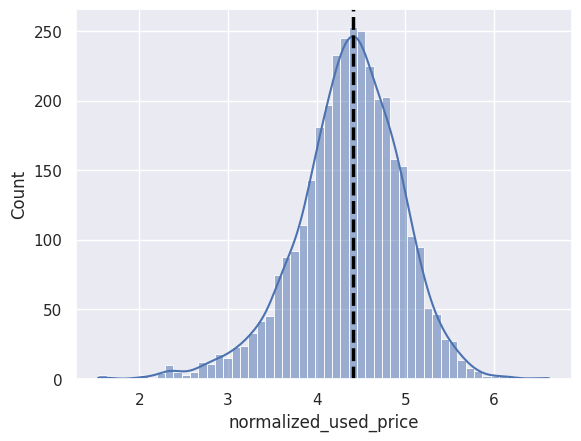

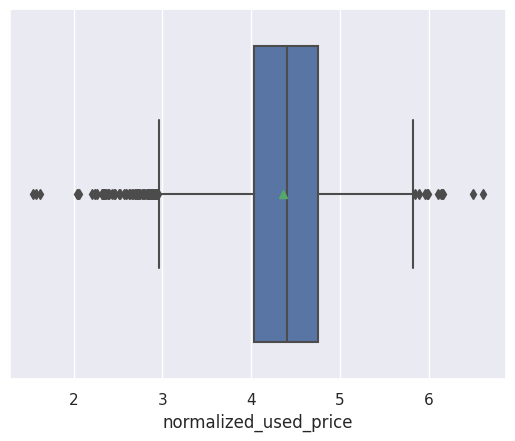

In [ ]:
sns.histplot(data=df,x='normalized_used_price', kde=True)
plt.axvline(x=df.normalized_used_price.median(),color='black',ls='--',lw=2.5)
plt.show()
sns.boxplot(data=df,x='normalized_used_price',showmeans=True)
plt.show()


Observation:The price of used phones approximately follows a normal distribution
From the box_plot we can see that there are outliers. Average price is 4.36 Euros

#### Normalized new price

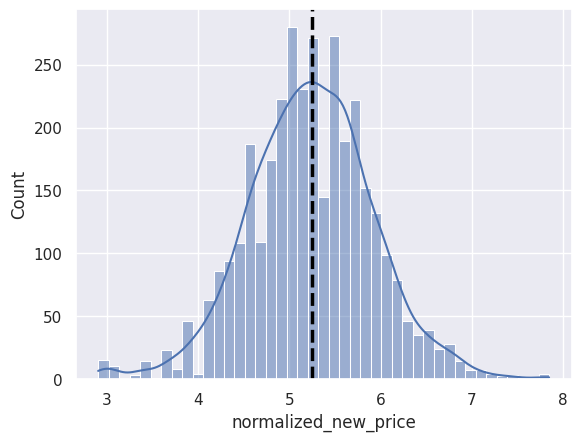

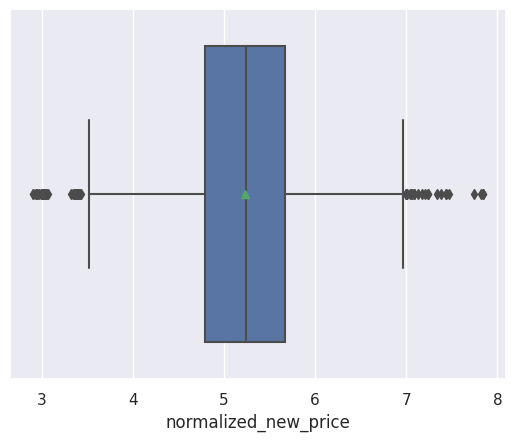

In [ ]:
sns.histplot(data=df,x='normalized_new_price', kde=True)
plt.axvline(x=df.normalized_new_price.median(),color='black',ls='--',lw=2.5)
plt.show()
sns.boxplot(data=df,x='normalized_new_price',showmeans=True)
plt.show()

Observation: Normalized new price is almost a normal distribution with a mean of 5.233 Euros.And from the box plot we can see alot of outliers.

###Bivariate Analysis

#### Brand Name

##### Brand name vs screen_size

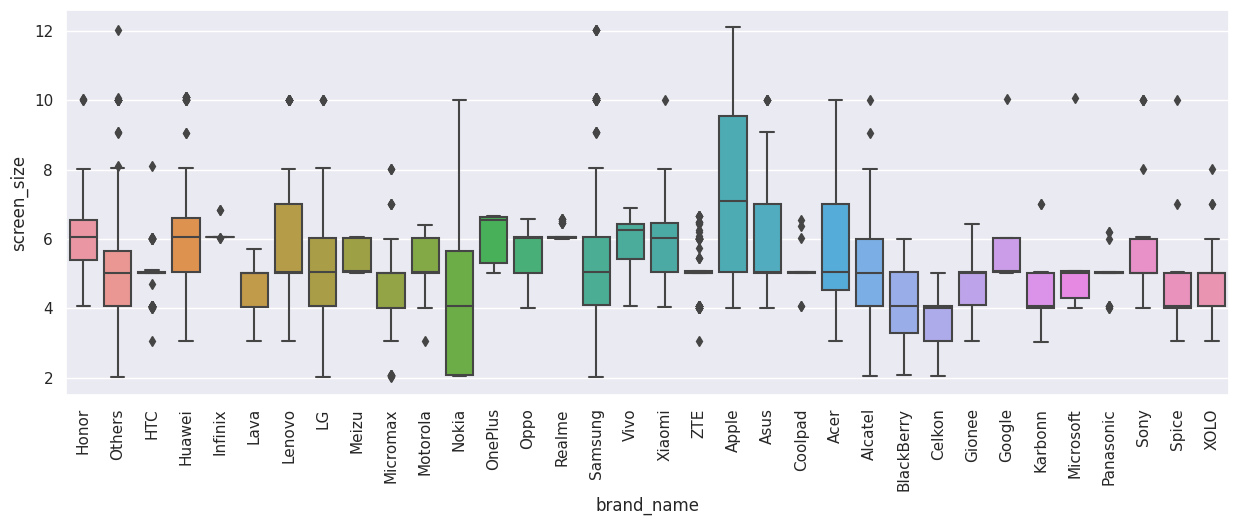

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df,x='brand_name',y='screen_size')
plt.xticks(rotation=90)
plt.show()

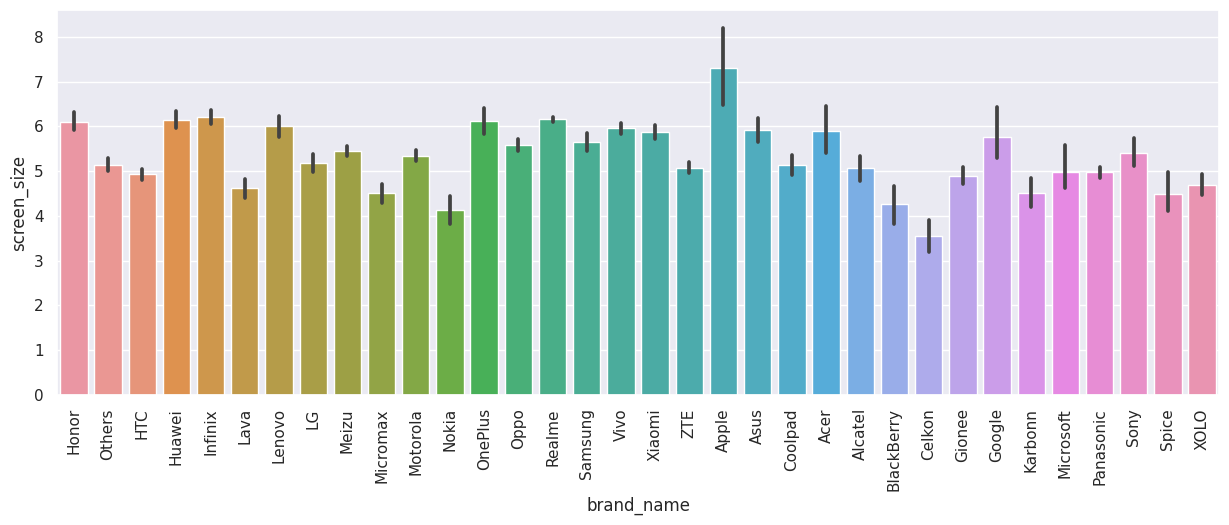

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df,x='brand_name',y='screen_size')
plt.xticks(rotation=90)
plt.show()

The screen size of Apple devices is the largest among the brands, and there are numerous outliers across various brands. This could be attributed to the same brand offering a wide range of phones to cater to different market segments.

##### Brand name vs main camera mp

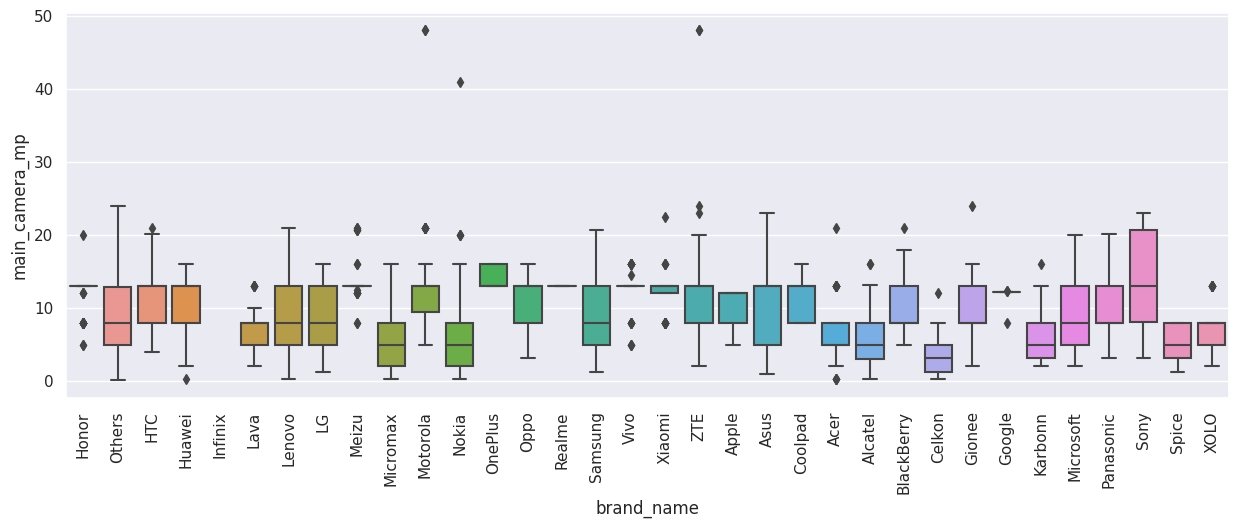

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df,x='brand_name',y='main_camera_mp')
plt.xticks(rotation=90)
plt.show()

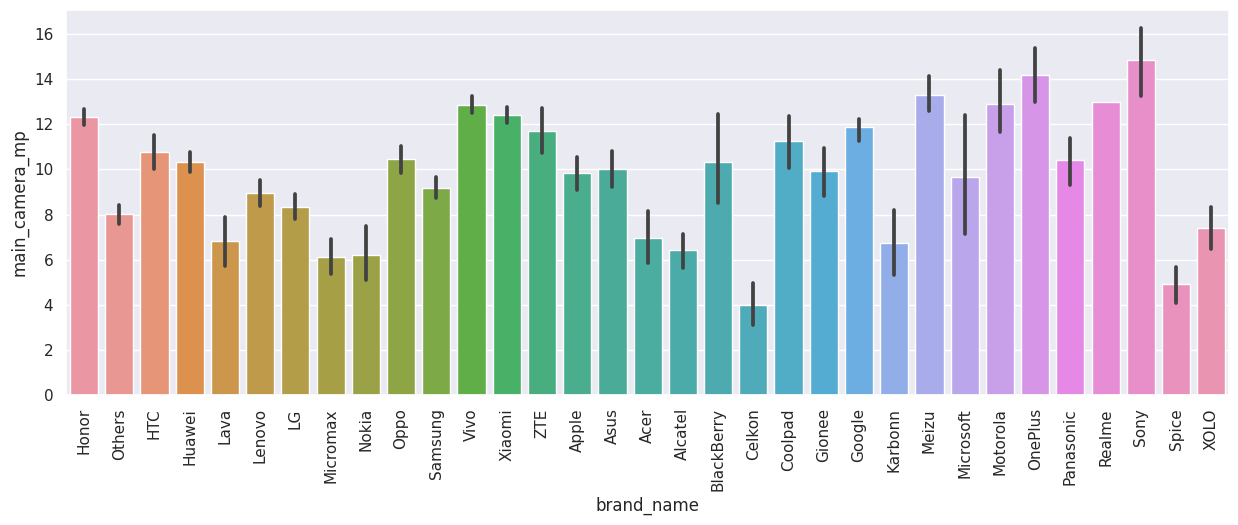

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df.dropna(),x='brand_name',y='main_camera_mp')
plt.xticks(rotation=90)
plt.show()

Sony,One plus brand phones have the best Main Camera in the time from 2013 to 2020. Also there are values missing for Infinix brand and we will explore to fix these missing values in a bit.

##### Brand name vs selie camera mp

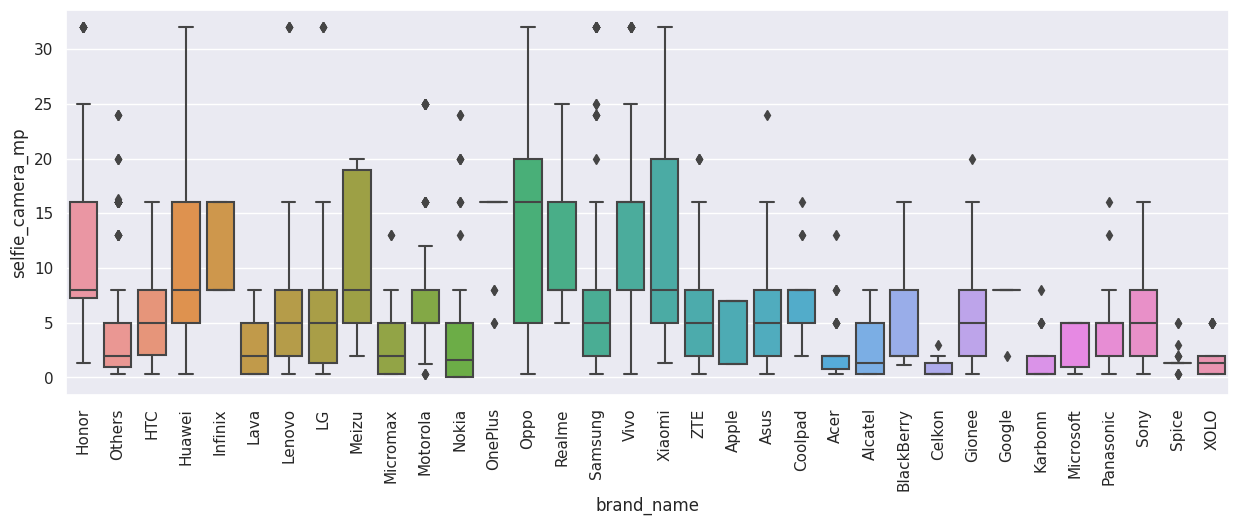

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df,x='brand_name',y='selfie_camera_mp')
plt.xticks(rotation=90)
plt.show()

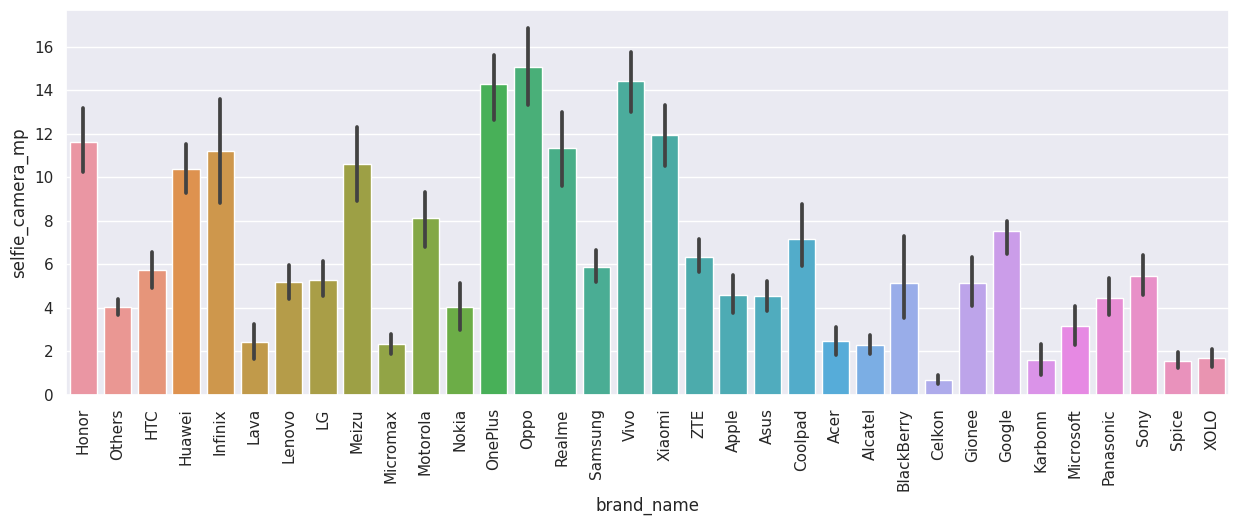

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df,x='brand_name',y='selfie_camera_mp')
plt.xticks(rotation=90)
plt.show()

Selfie Camera started to emerge during this time. We can see that Oppo , Vivo and One plus brand phones have great front camera.

##### Brand name vs int memory

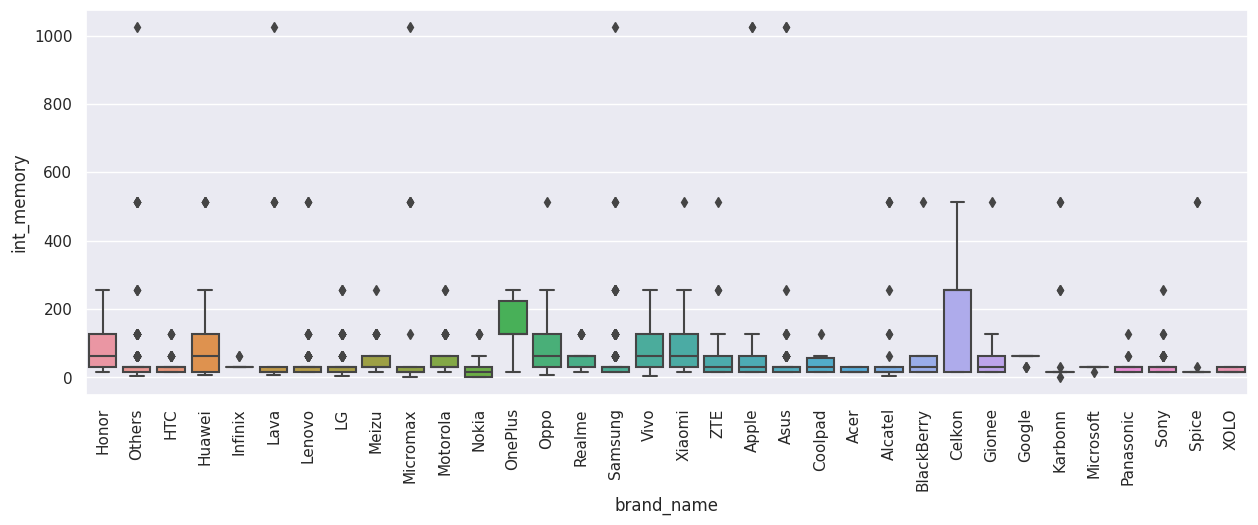

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df,x='brand_name',y='int_memory')
plt.xticks(rotation=90)
plt.show()

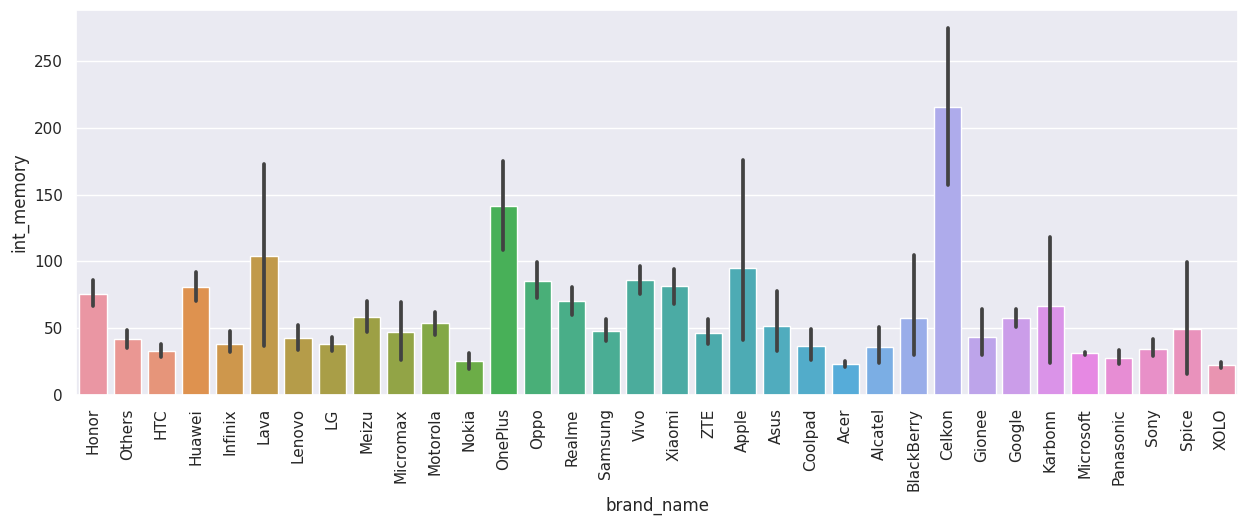

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df,x='brand_name',y='int_memory')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df[df['brand_name']=='Celkon']

brand_name       os  screen_size  4g  5g  main_camera_mp  \
939     Celkon  Android      4.00304  no  no            5.00   
940     Celkon  Android      4.00304  no  no            5.00   
941     Celkon  Android      4.00304  no  no            5.00   
942     Celkon  Android      5.00380  no  no            8.00   
943     Celkon  Android      5.00380  no  no            5.00   
944     Celkon  Android      4.00304  no  no            3.15   
945     Celkon  Android      4.05426  no  no            8.00   
946     Celkon  Android      3.05350  no  no            3.15   
947     Celkon  Android      4.05426  no  no            5.00   
948     Celkon  Android      5.00380  no  no            5.00   
949     Celkon  Android      4.05426  no  no            5.00   
950     Celkon  Android      3.05350  no  no            3.15   
951     Celkon   Others      3.05350  no  no            1.30   
952     Celkon   Others      2.04092  no  no            1.30   
953     Celkon   Others      2.08032  no  no            1.30   
954     Celkon   Others      2.06062  no  no            1.30   
955     Celkon   Others      2.06062  no  no            0.30   
956     Celkon  Android      5.00380  no  no            8.00   
957     Celkon  Android      4.00304  no  no            3.15   
958     Celkon  Android      4.00304  no  no            3.15   
959     Celkon  Android      3.05350  no  no            1.30   
960     Celkon  Android      5.00380  no  no           12.00   
961     Celkon  Android      4.00304  no  no            5.00   
962     Celkon  Android      4.07396  no  no            8.00   
963     Celkon   Others      4.00304  no  no            2.00   
964     Celkon   Others      3.05350  no  no            2.00   
965     Celkon   Others      2.04092  no  no            1.30   
966     Celkon   Others      2.04092  no  no            1.30   
967     Celkon   Others      2.06062  no  no            1.30   
968     Celkon   Others      2.06062  no  no            1.30   
969     Celkon  Android      4.63344  no  no            5.00   
970     Celkon  Android      4.63344  no  no            8.00   
971     Celkon  Android      3.05350  no  no            3.15   

     selfie_camera_mp  int_memory   ram  battery  weight  release_year  \
939               1.3        16.0  4.00   1400.0   122.0          2014   
940               1.3        16.0  4.00   1400.0   122.0          2014   
941               1.3        16.0  4.00   1400.0   122.0          2014   
942               2.0        16.0  4.00   1400.0   149.0          2014   
943               0.3        32.0  4.00   1400.0   147.0          2014   
944               1.3       512.0  0.25   1400.0   115.3          2014   
945               1.3        16.0  4.00   2000.0   130.0          2014   
946               0.3       512.0  4.00   1400.0   102.0          2014   
947               1.3        16.0  4.00   1400.0    78.2          2014   
948               0.3        16.0  4.00   1400.0   140.0          2013   
949               1.3        16.0  4.00   1400.0   140.0          2013   
950               0.3       512.0  0.25   1400.0   140.0          2013   
951               0.3       256.0  0.25   1200.0   140.0          2013   
952               0.3       256.0  0.25   1800.0   140.0          2013   
953               0.3       256.0  0.25   1400.0   140.0          2013   
954               0.3       256.0  0.25   1400.0   140.0          2013   
955               0.3       256.0  0.25   1400.0   140.0          2013   
956               1.3        16.0  4.00   1400.0   140.0          2013   
957               0.3       512.0  0.25   1400.0   140.0          2013   
958               0.3       256.0  0.25   1400.0   140.0          2013   
959               0.3       256.0  0.25   1400.0   140.0          2013   
960               3.0        16.0  4.00   1400.0   177.0          2013   
961               0.3       512.0  0.25   1400.0   140.0          2013   
962               0.3       256.0  0.25   1400.0   

One Plus, Apple and Lava brand phones have higher internal memory. In Celkon, taking into the year of release, these 512 and 256 values can also be in MB and could have entered as GB.

##### Brand name vs ram

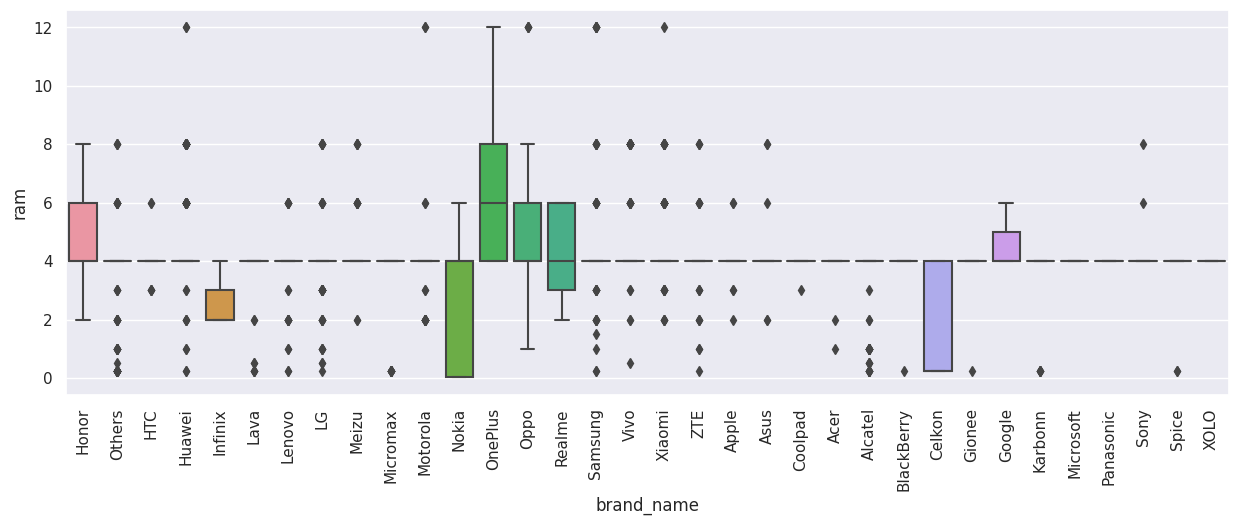

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df,x='brand_name',y='ram')
plt.xticks(rotation=90)
plt.show()

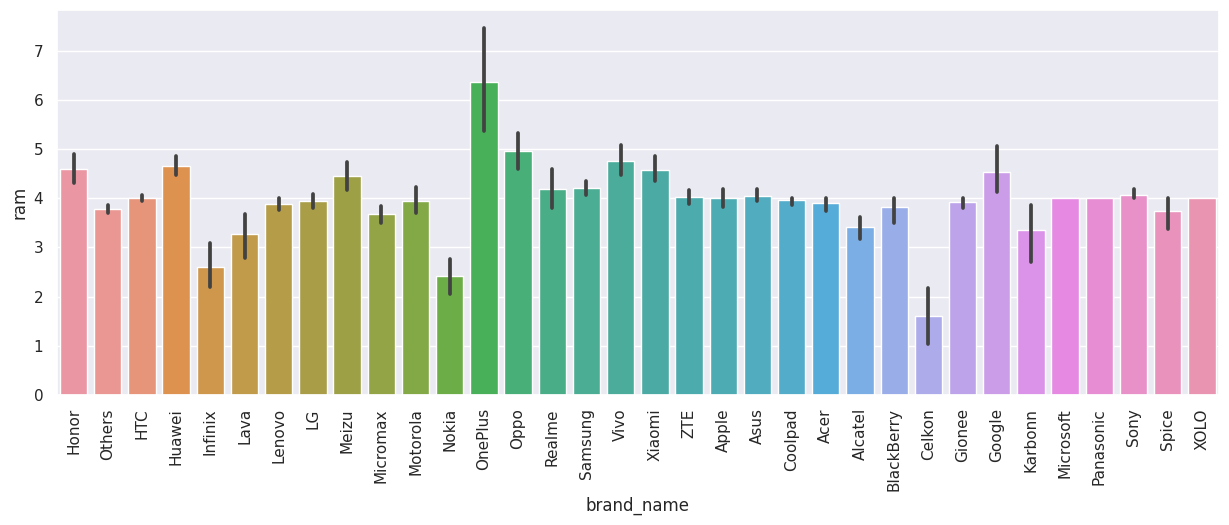

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df,x='brand_name',y='ram')
plt.xticks(rotation=90)
plt.show()

Ram - Top 5 brands are One Plus, Oppo, Huawei, Honor and Google

##### Brand name vs battery

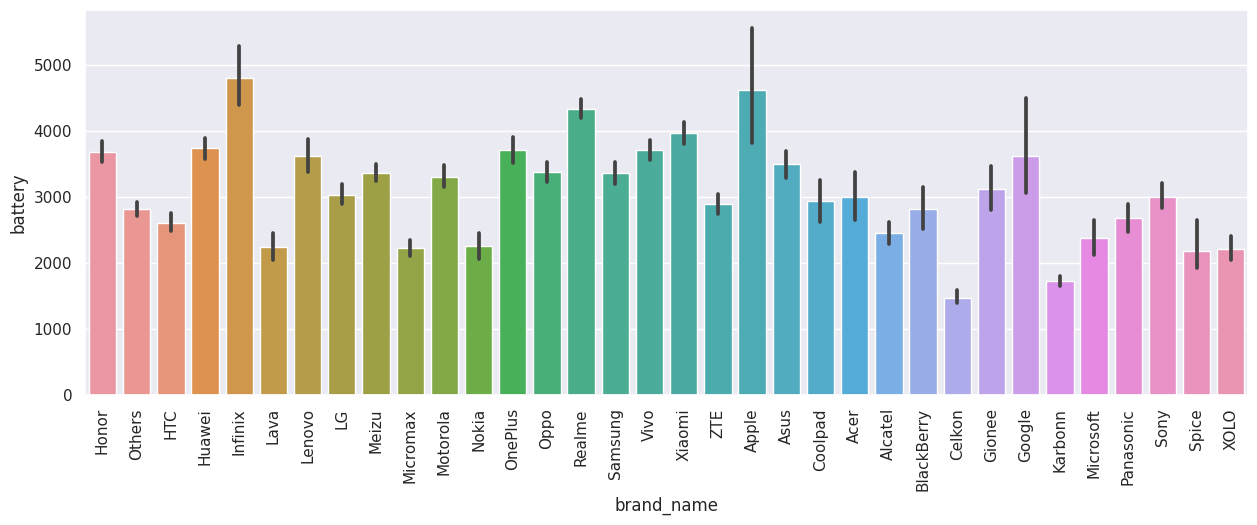

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df,x='brand_name',y='battery')
plt.xticks(rotation=90)
plt.show()

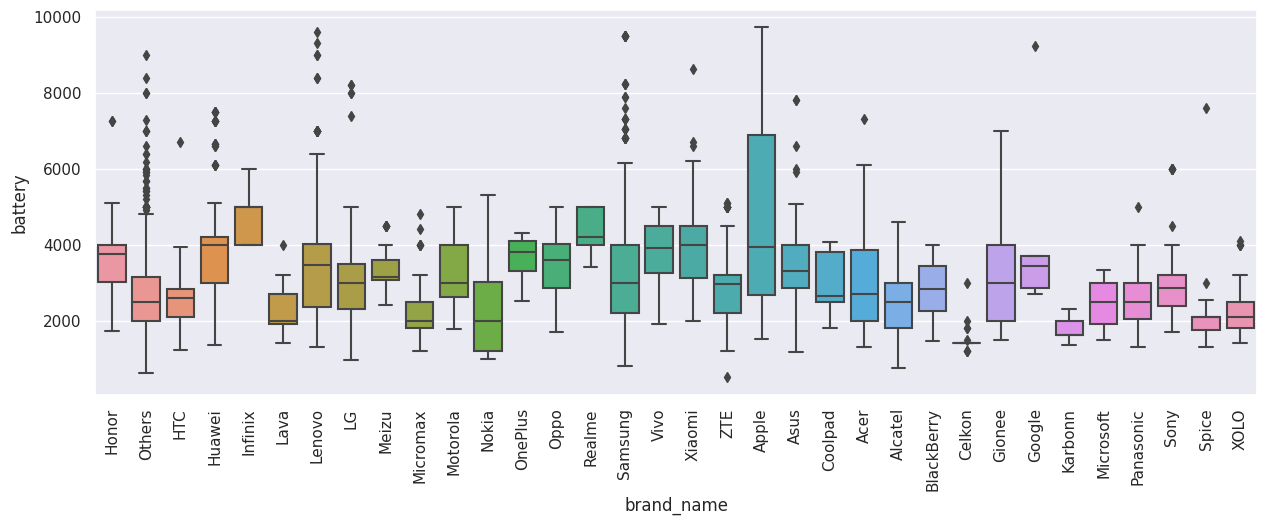

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df,x='brand_name',y='battery')
plt.xticks(rotation=90)
plt.show()

Apple phones are consistently having higher battery capacity over the years.

##### Brand name vs weight

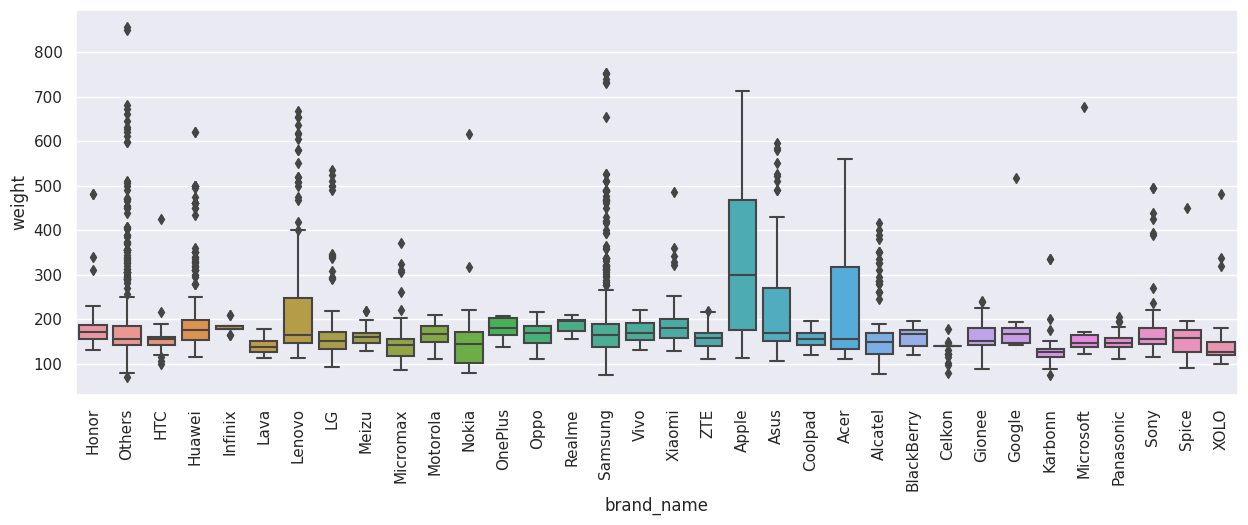

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df,x='brand_name',y='weight')
plt.xticks(rotation=90)
plt.show()

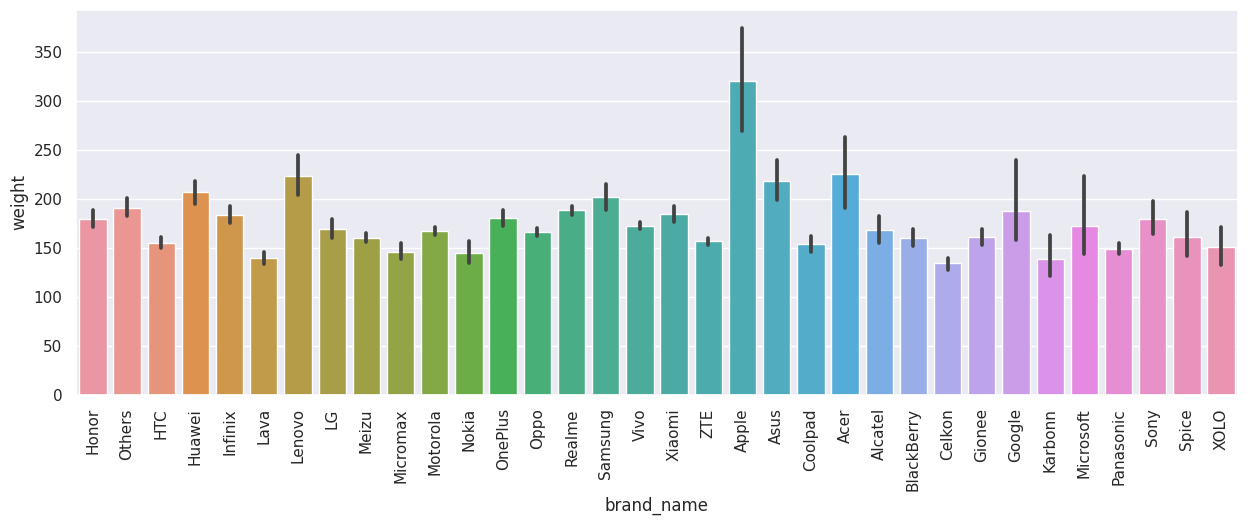

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df,x='brand_name',y='weight')
plt.xticks(rotation=90)
plt.show()

Apple phones are much heavier than the other brands available.

##### Brand name vs days used

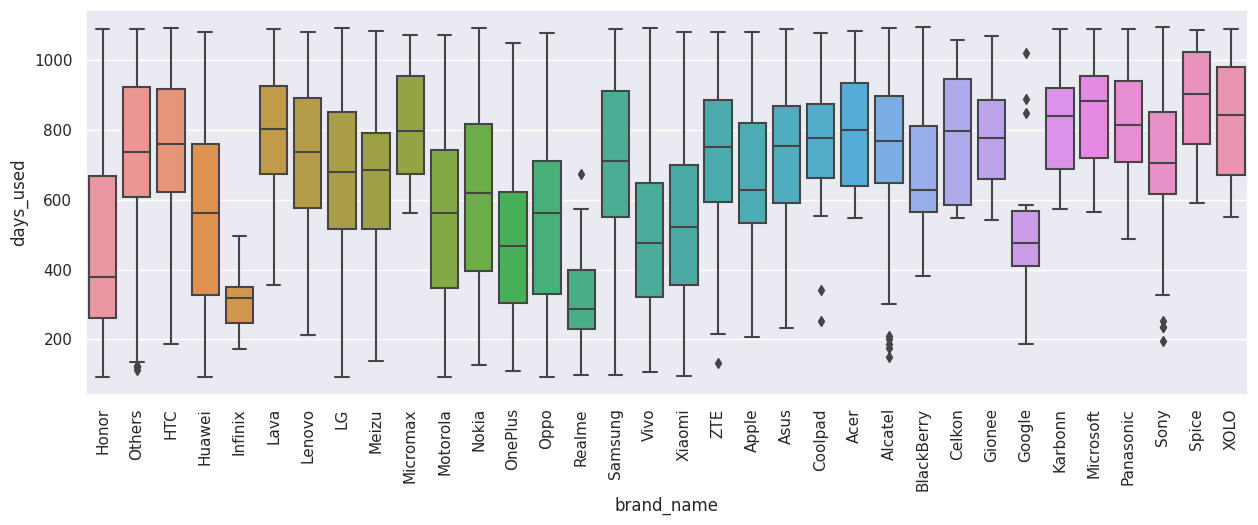

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df,x='brand_name',y='days_used')
plt.xticks(rotation=90)
plt.show()

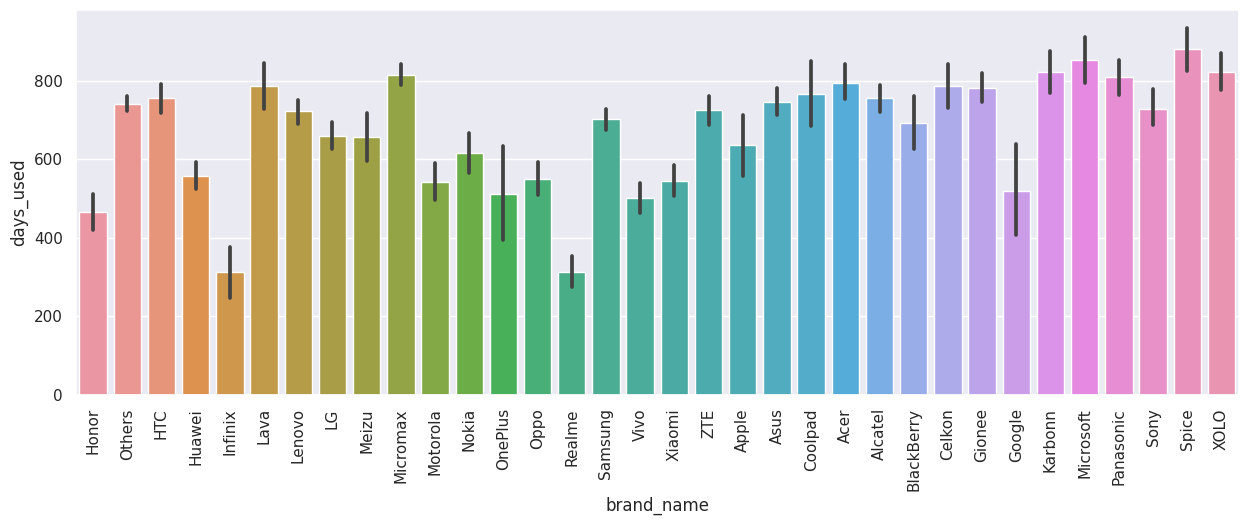

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df,x='brand_name',y='days_used')
plt.xticks(rotation=90)
plt.show()

On average, Infinix and Realme brand phones exhibit the shortest duration of previous use.

##### Brand name vs normalized used price

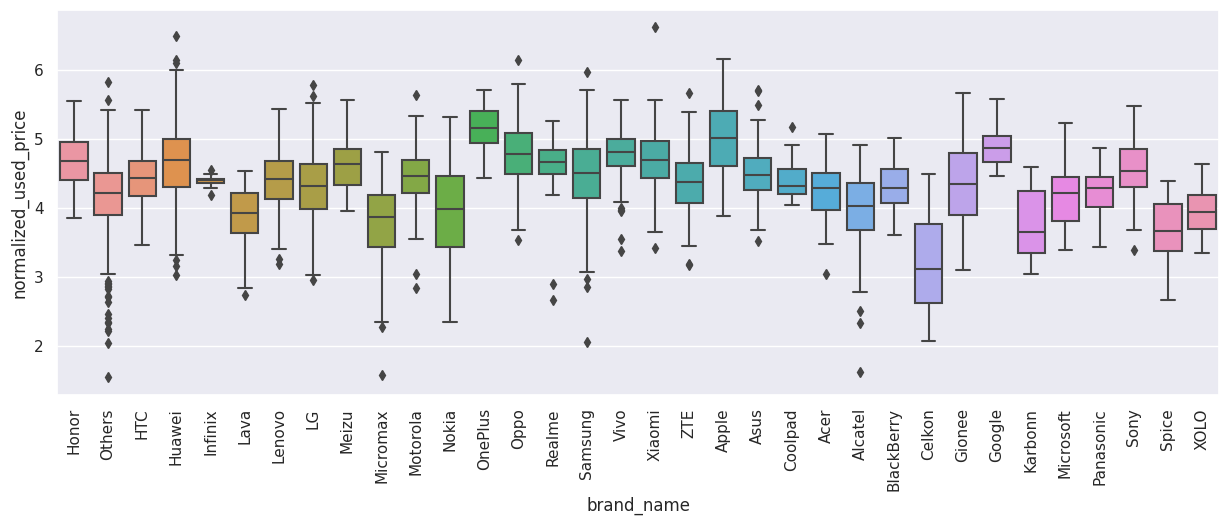

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df,x='brand_name',y='normalized_used_price')
plt.xticks(rotation=90)
plt.show()

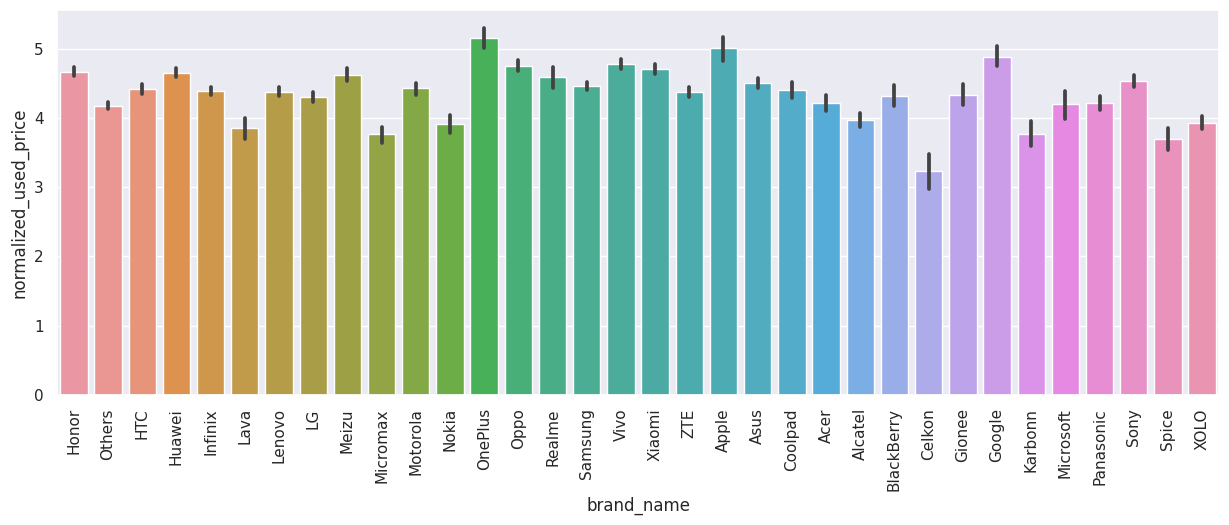

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df,x='brand_name',y='normalized_used_price')
plt.xticks(rotation=90)
plt.show()

One Plus, Apple and Google brands have higher resale prices.

##### Brand name vs normalized new price

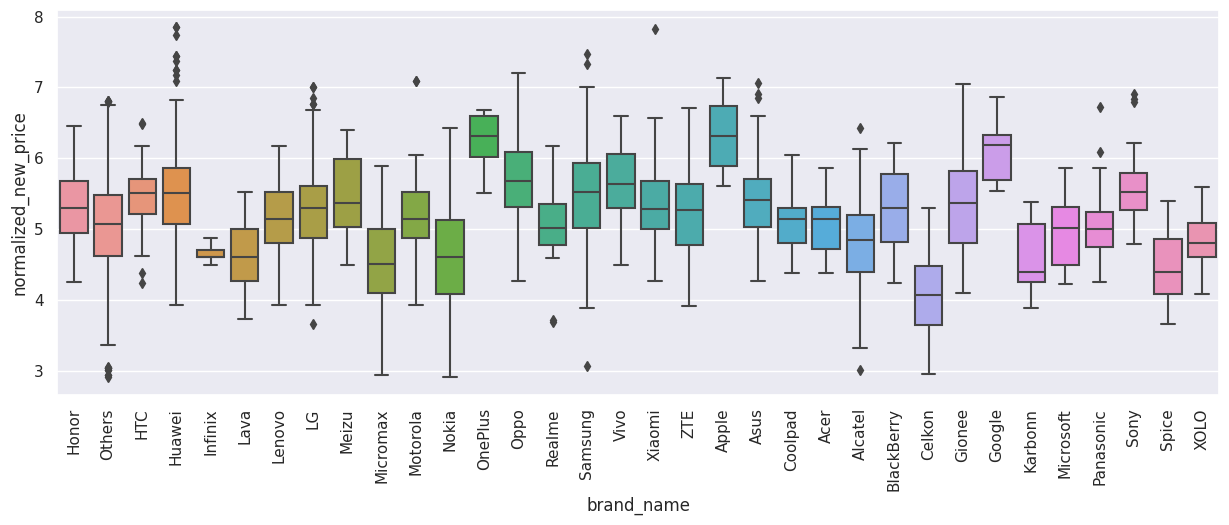

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df,x='brand_name',y='normalized_new_price')
plt.xticks(rotation=90)
plt.show()

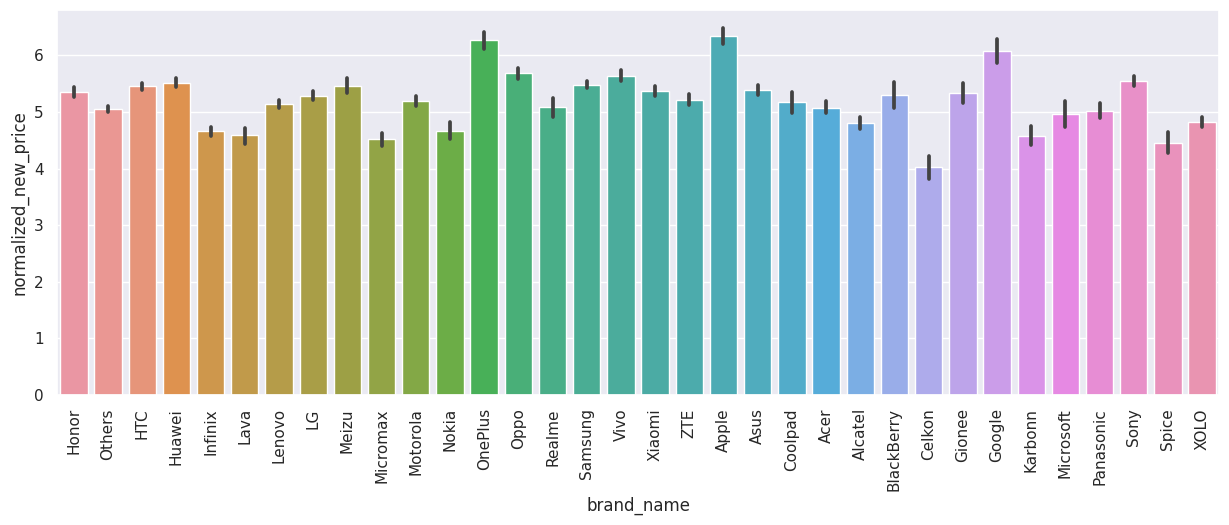

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df,x='brand_name',y='normalized_new_price')
plt.xticks(rotation=90)
plt.show()

Observations: One Plus, Apple and Google brands have higher new prices.

####OS

##### OS vs Screen size

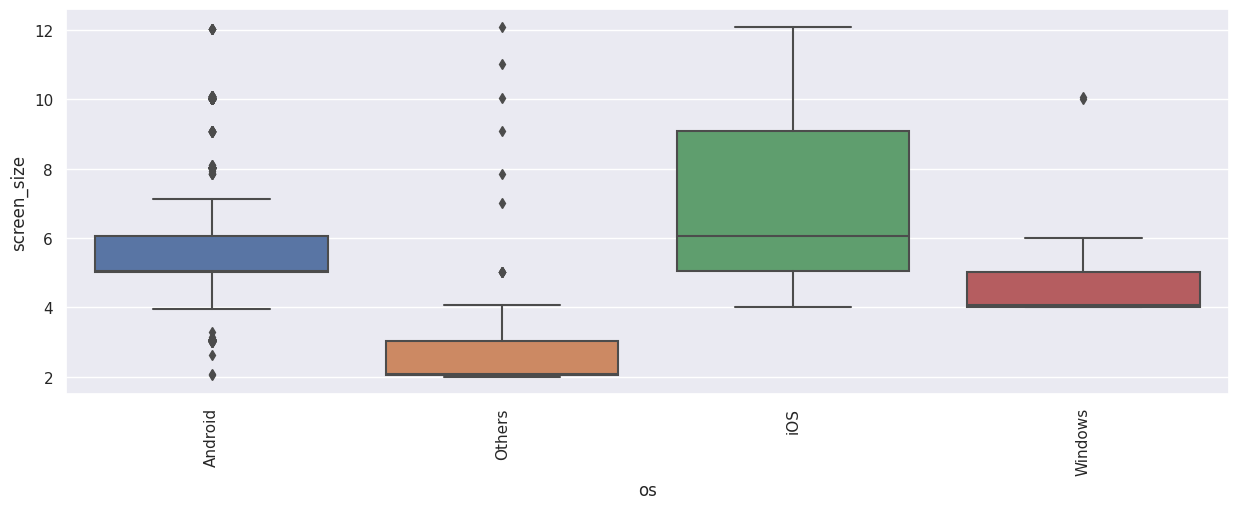

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df,x='os',y='screen_size')
plt.xticks(rotation=90)
plt.show()

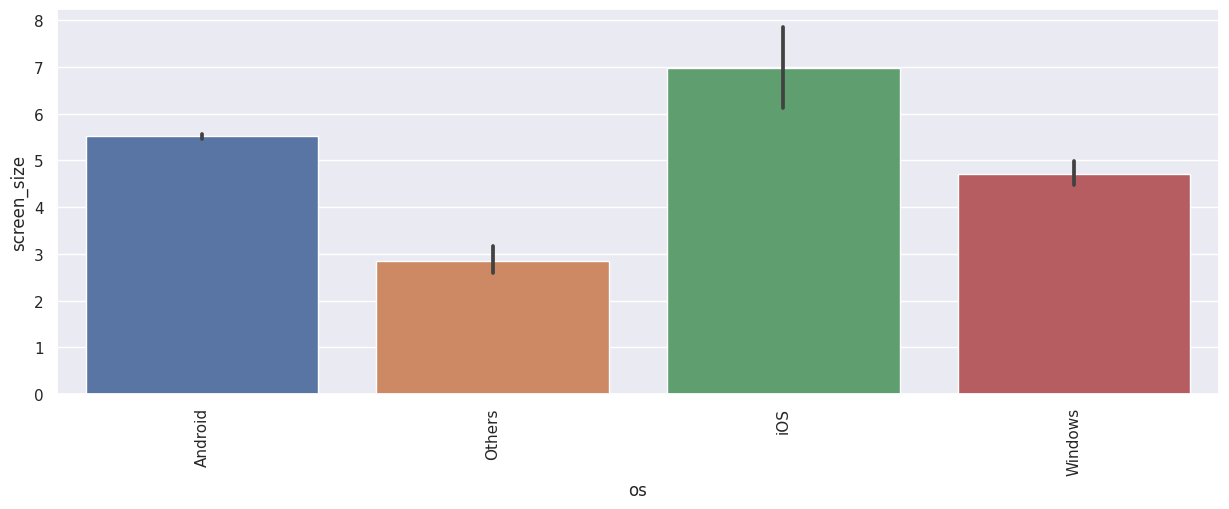

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df,x='os',y='screen_size')
plt.xticks(rotation=90)
plt.show()

iOS have higher Screen Size consistent with our previous findings.

##### OS vs Main Camera mp

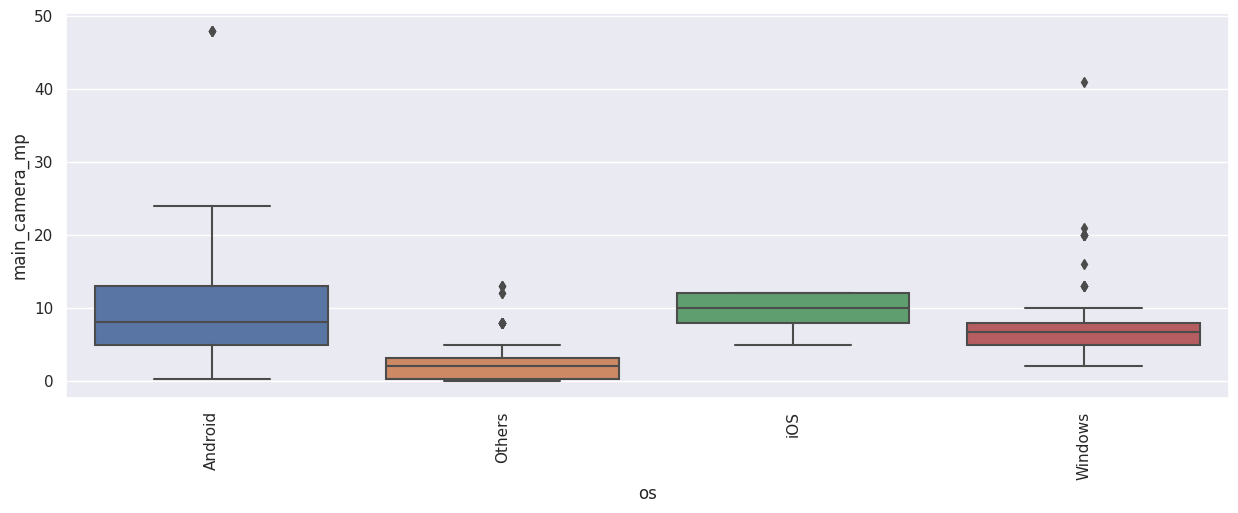

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df,x='os',y='main_camera_mp')
plt.xticks(rotation=90)
plt.show()

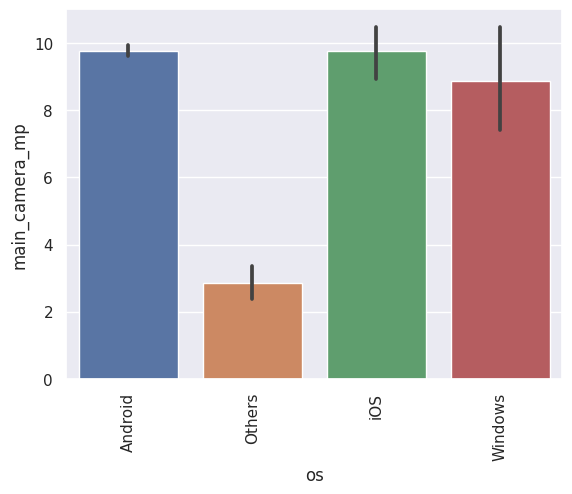

In [ ]:
sns.barplot(data=df,x='os',y='main_camera_mp')
plt.xticks(rotation=90)
plt.show()

All the phones have increasing main camera capacity over the years.

##### OS vs Selfie Camera mp

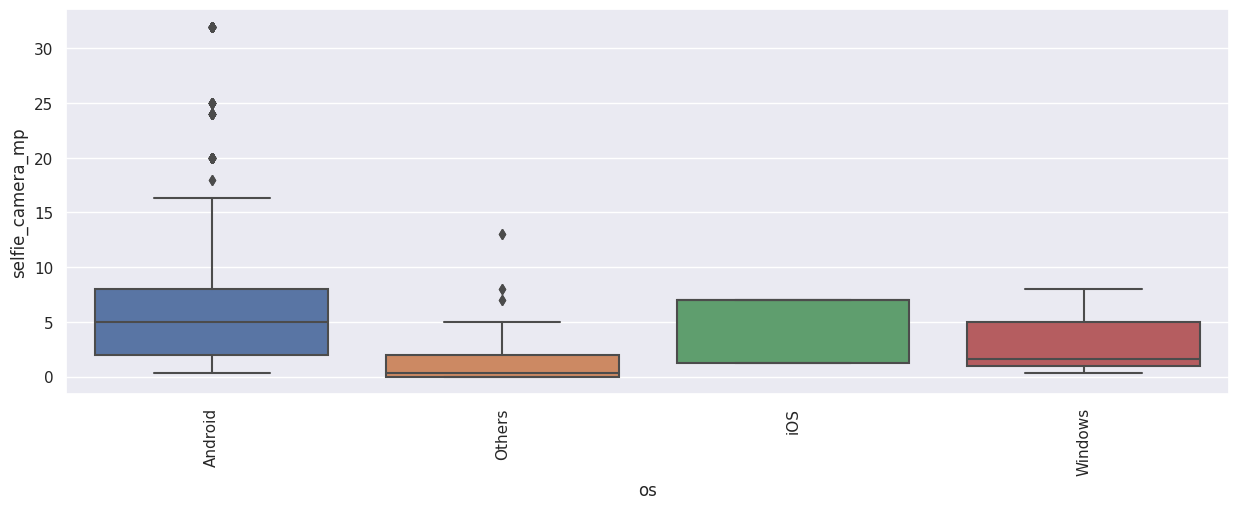

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df,x='os',y='selfie_camera_mp')
plt.xticks(rotation=90)
plt.show()

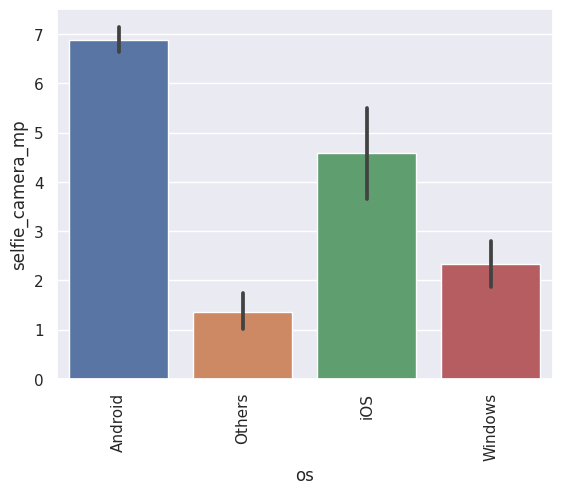

In [ ]:
sns.barplot(data=df,x='os',y='selfie_camera_mp')
plt.xticks(rotation=90)
plt.show()

Android phones have higher selfie camera mp.

##### OS vs Int Memory

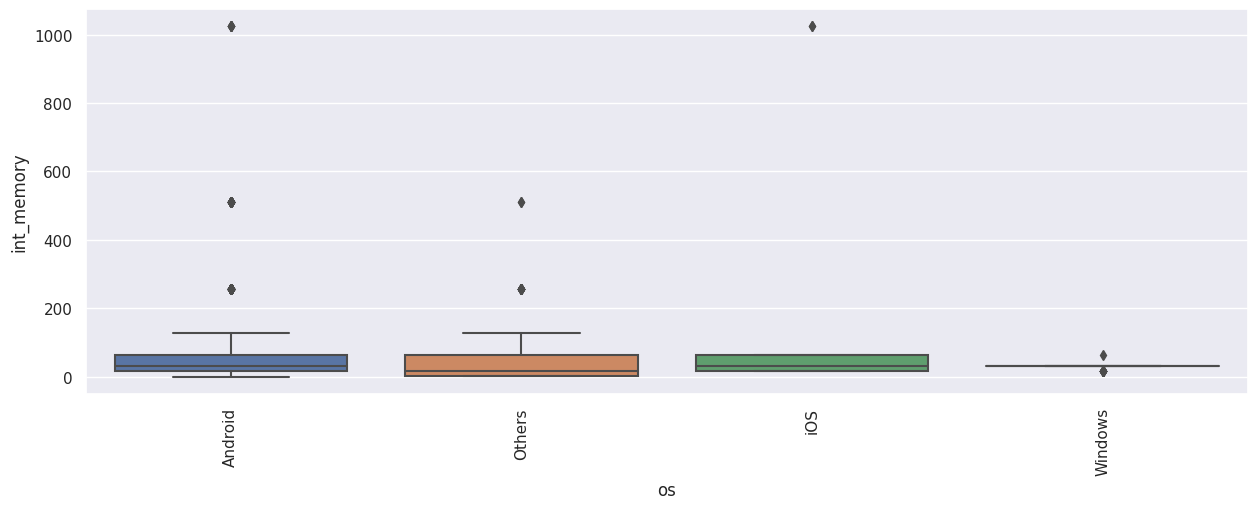

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df,x='os',y='int_memory')
plt.xticks(rotation=90)
plt.show()

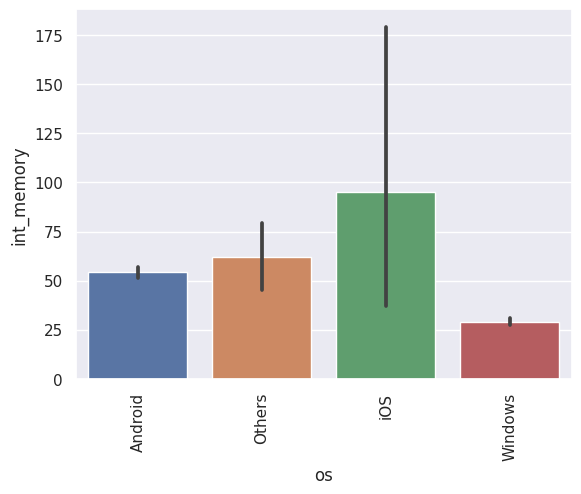

In [ ]:
sns.barplot(data=df,x='os',y='int_memory')
plt.xticks(rotation=90)
plt.show()

The variance of iOS devices have increased alot over the years comparatively.

##### OS vs RAM

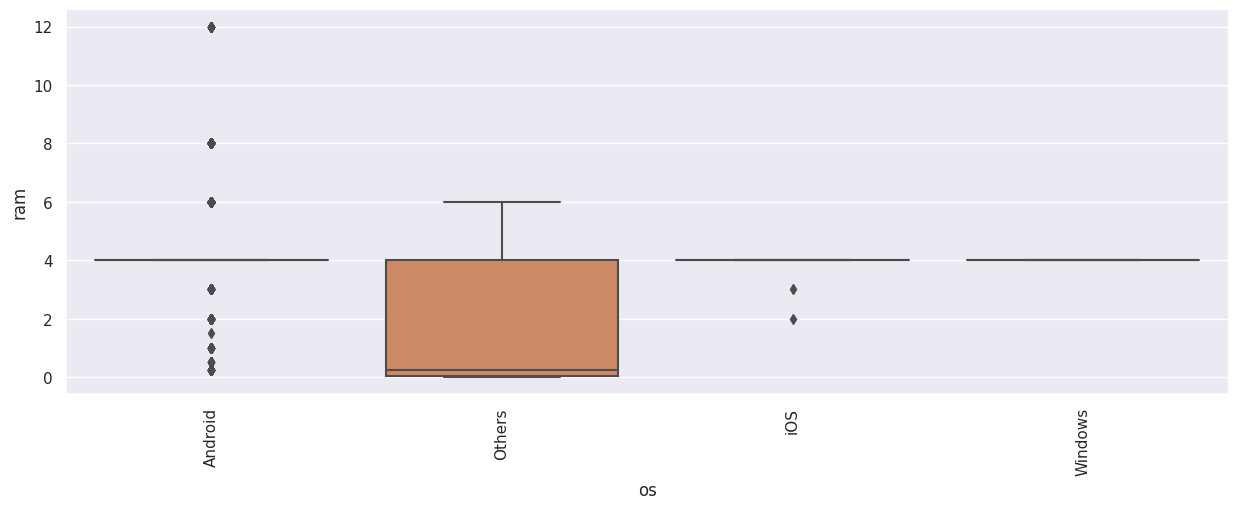

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df,x='os',y='ram')
plt.xticks(rotation=90)
plt.show()

Most of the used phones have 4 GB Ram.

##### OS vs Battery

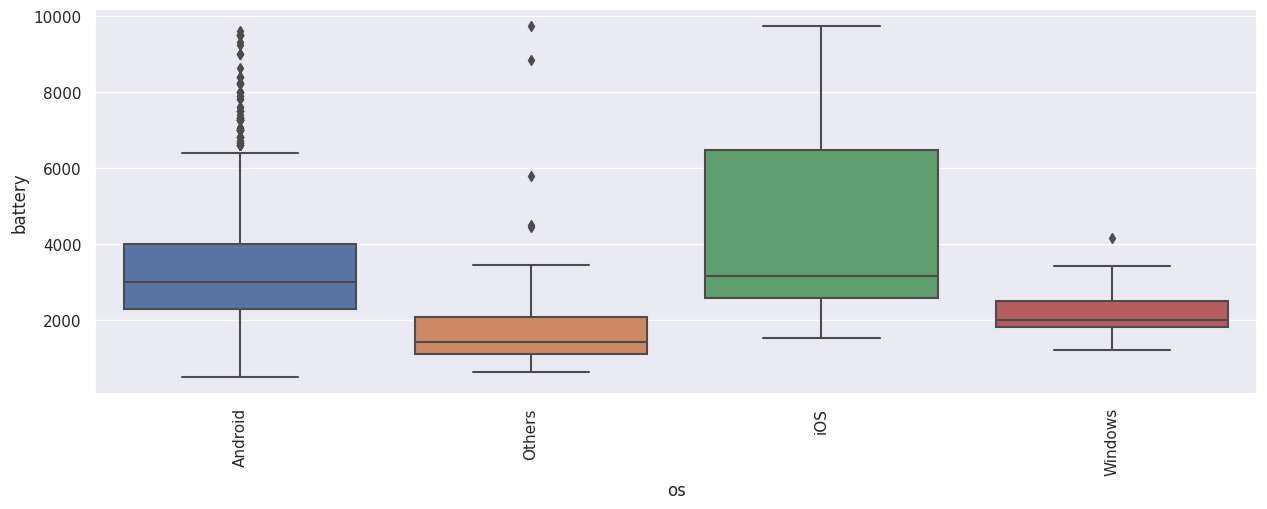

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df,x='os',y='battery')
plt.xticks(rotation=90)
plt.show()

##### OS vs Weight

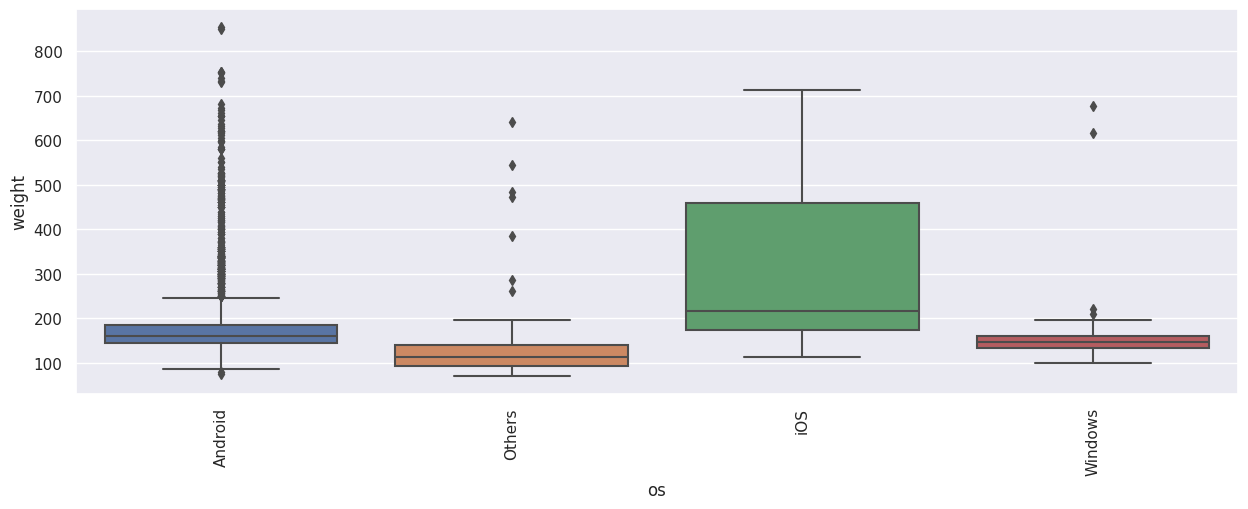

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df,x='os',y='weight')
plt.xticks(rotation=90)
plt.show()

##### OS vs Days used

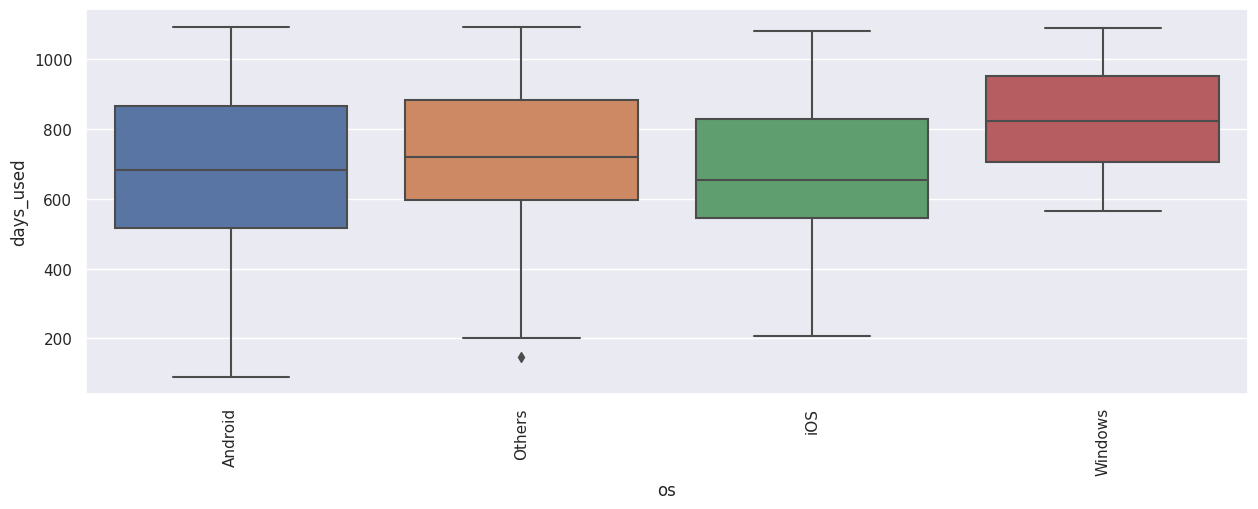

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df,x='os',y='days_used')
plt.xticks(rotation=90)
plt.show()

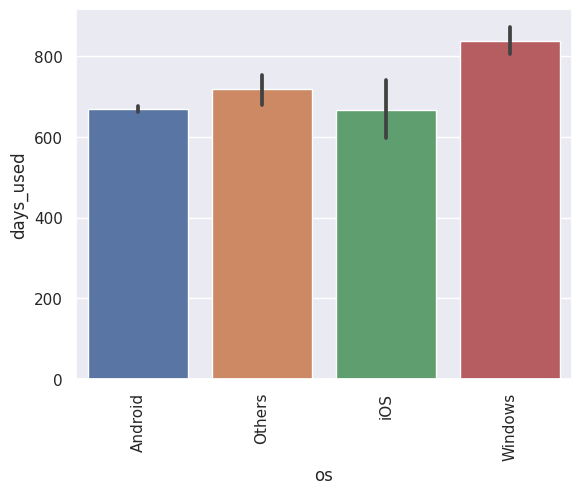

In [ ]:
sns.barplot(data=df,x='os',y='days_used')
plt.xticks(rotation=90)
plt.show()

Windows phones have been used for longer time than others.

##### OS vs Normalized Used Price

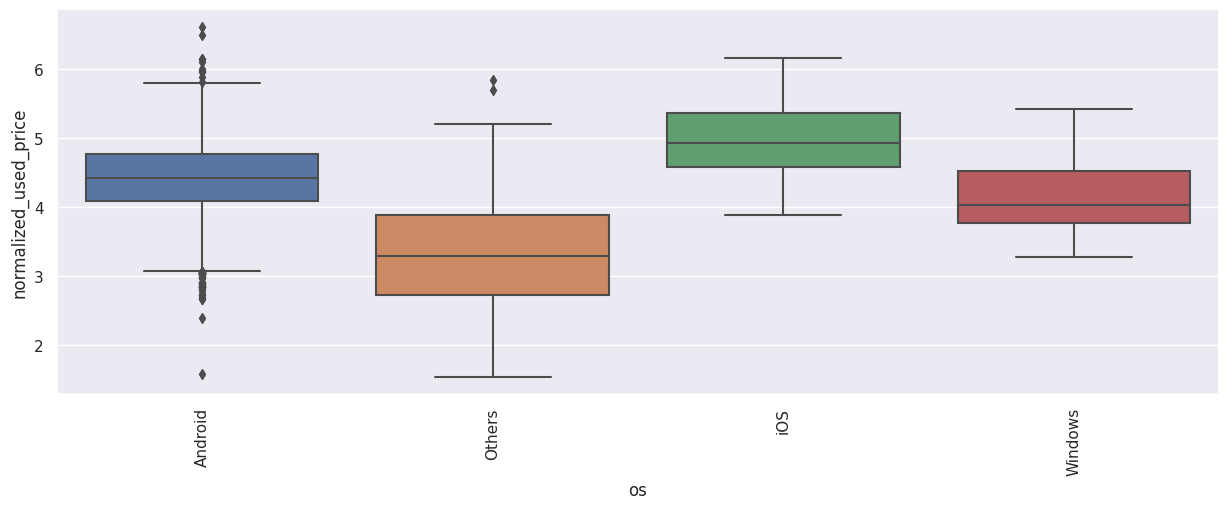

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df,x='os',y='normalized_used_price')
plt.xticks(rotation=90)
plt.show()

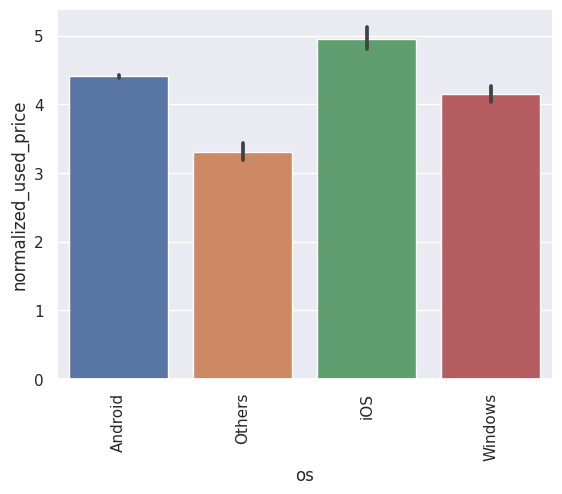

In [ ]:
sns.barplot(data=df,x='os',y='normalized_used_price')
plt.xticks(rotation=90)
plt.show()

Apple used phones have higher prices compared with others and going with the general trend

##### OS vs Normalized New Price

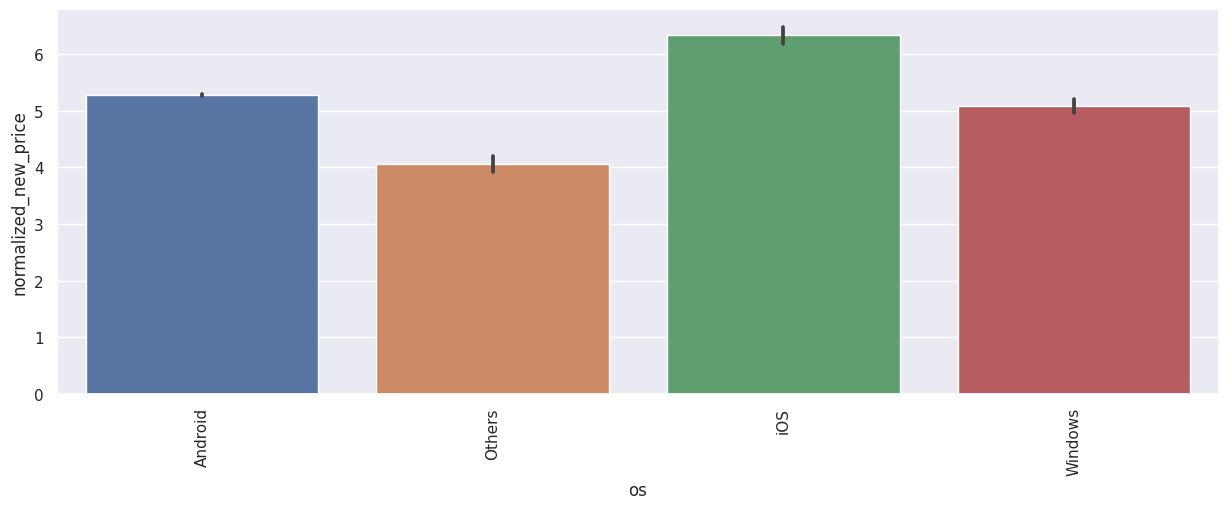

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df,x='os',y='normalized_new_price')
plt.xticks(rotation=90)
plt.show()

Observations: iOS have higher new price phones than others.

#### Analysing the Normalized Used Price

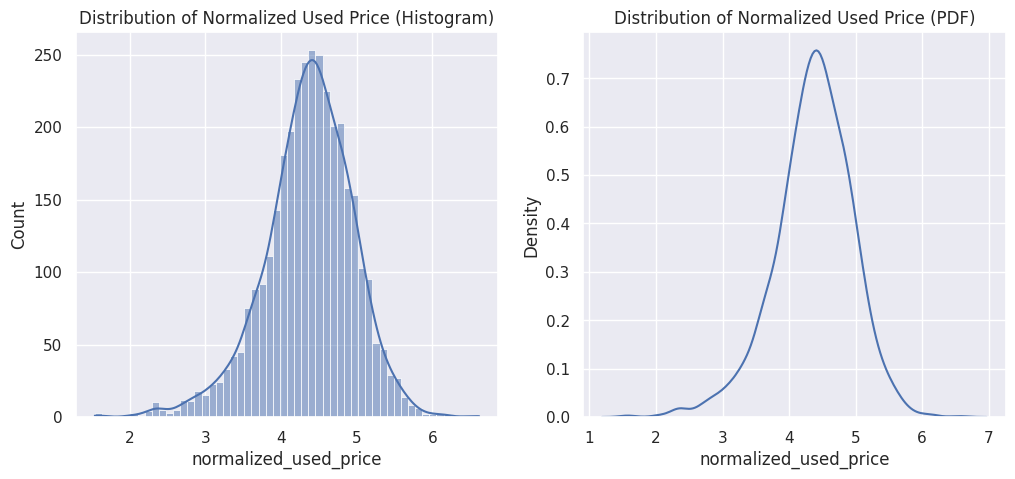

In [ ]:
# Distribution Analysis
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['normalized_used_price'], kde=True)
plt.title('Distribution of Normalized Used Price (Histogram)')

plt.subplot(1, 2, 2)
sns.kdeplot(df['normalized_used_price'])
plt.title('Distribution of Normalized Used Price (PDF)')
plt.show()


#### Brand vs. Battery vs. Release year

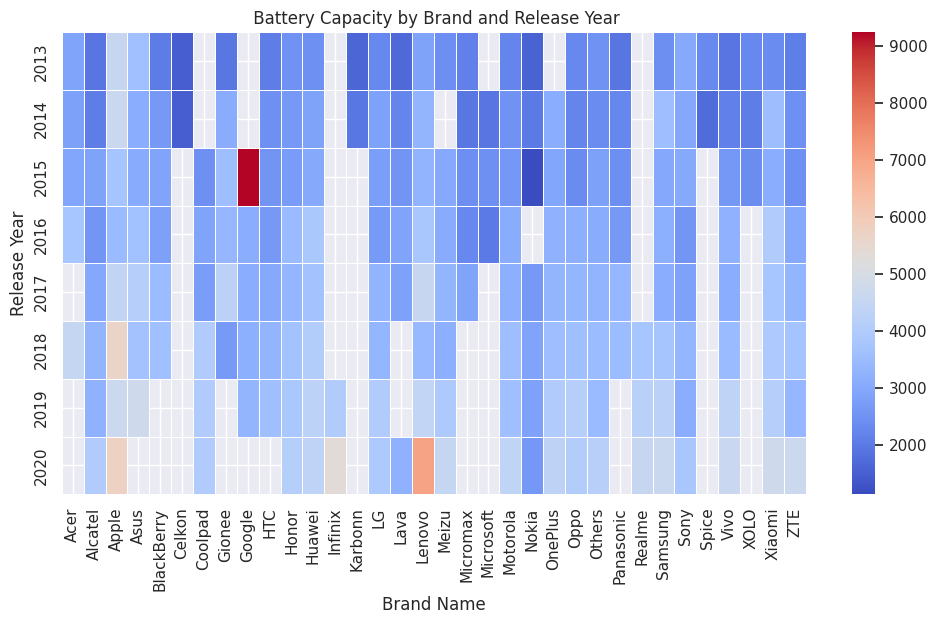

In [ ]:
# Create a pivot table for the data
pivot_table = df.pivot_table(index='release_year', columns='brand_name', values='battery', aggfunc='mean')

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=False, fmt='.1f', cbar=True, linewidths=0.5)
plt.title(' Battery Capacity by Brand and Release Year')
plt.xlabel('Brand Name')
plt.ylabel('Release Year')
plt.show()

As the release year is increasing , we can see the battery capacity increasing for most phones.

#### Price vs Release Year vs Brands

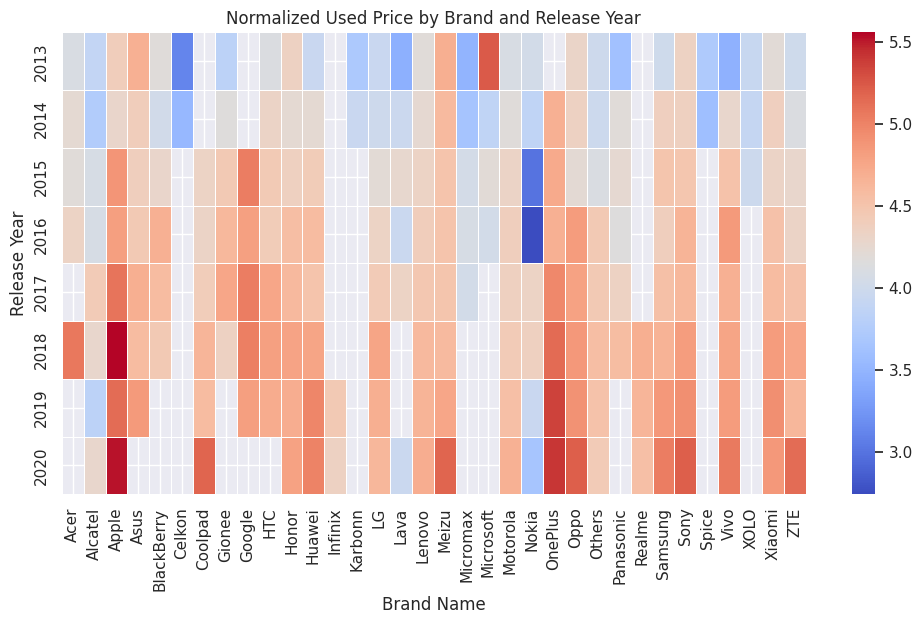

In [ ]:
# Create a pivot table for the data
pivot_table = df.pivot_table(index='release_year', columns='brand_name', values='normalized_used_price', aggfunc='mean')

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=False, fmt='.1f', cbar=True, linewidths=0.5)
plt.title('Normalized Used Price by Brand and Release Year')
plt.xlabel('Brand Name')
plt.ylabel('Release Year')
plt.show()

We could see some brands that are lux brands, mid range and budget phones that are spread across all years. There is a gradual increase in the price. Older the phones, lower the price.

#### Corelation of variables

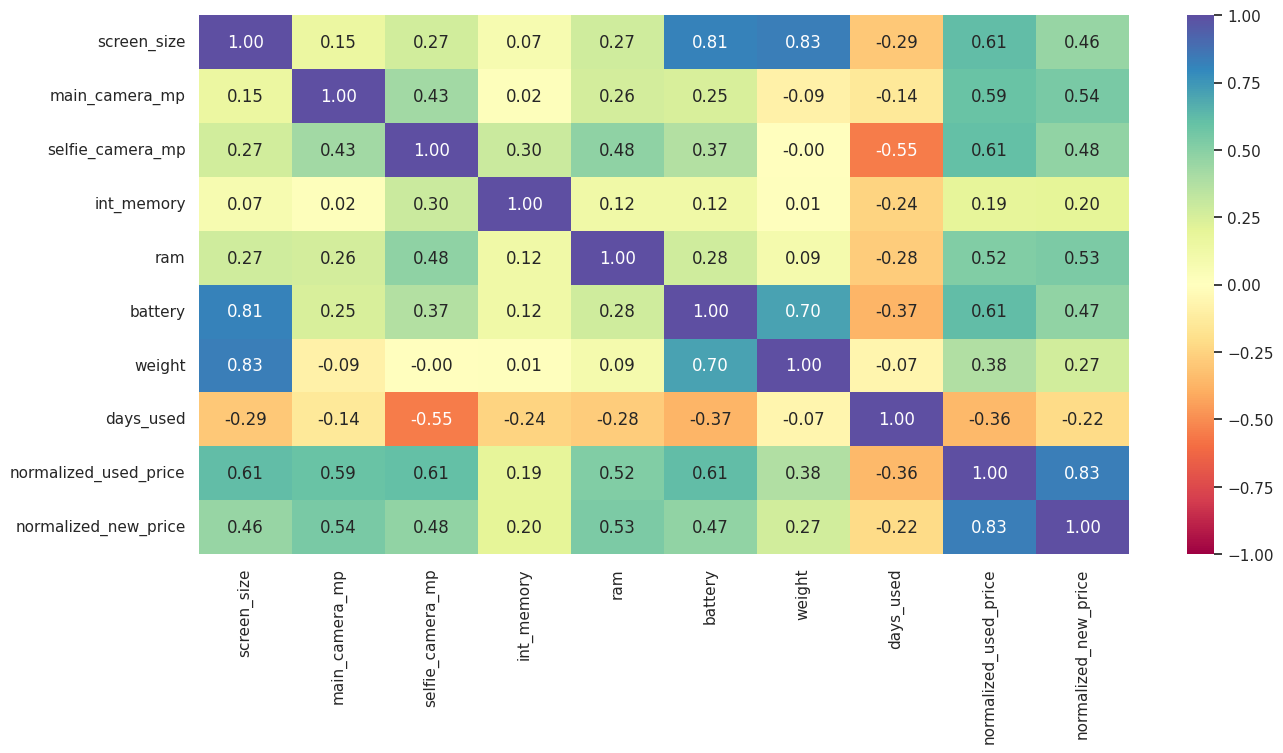

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Observations:
1. The screen size displays a robust positive correlation with both weight and battery capacity, which may be attributed to phones requiring a greater power supply to operate. As a result, there is a strong correlation between battery and screen size.

2. Weight and screen size are closely associated, showing a significant positive correlation.

3. Notably, normalized new price and normalized used price exhibit a strong positive correlation.

4. Conversely, a negative correlation is observed between the number of days a device has been used and the resolution of the selfie camera.

5. There is a negative correlation between the duration a device has been used and its normalized used price.

#### Analysis of Normalized prices with 4g/5g Phones

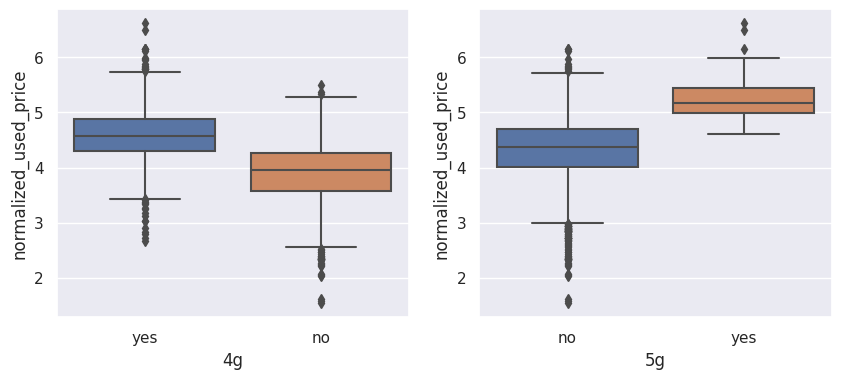

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

Normalized used prices typically rise for 4G phones, but they decrease for devices equipped with 5G capabilities.

### **Questions**:

####1. What does the distribution of normalized used device prices look like?






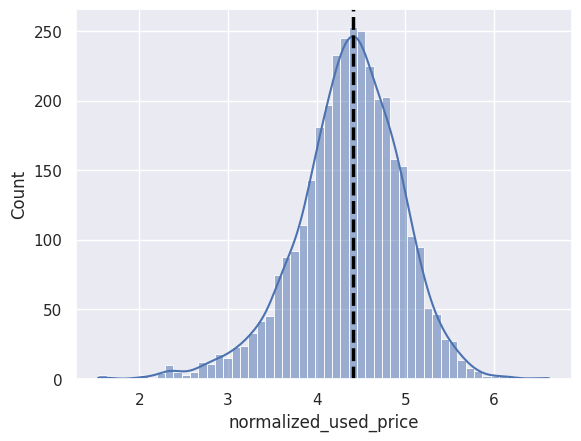

In [ ]:
sns.histplot(data=df,x='normalized_used_price', kde=True)
plt.axvline(x=df.normalized_used_price.median(),color='black',ls='--',lw=2.5)
plt.show()

The Normalized used price data distribution looks like almost a normal distribution.

####2. What percentage of the used device market is dominated by Android devices?

In [ ]:
df['os'].value_counts(normalize=True)

Android    0.930515
Others     0.039664
Windows    0.019398
iOS        0.010423
Name: os, dtype: float64

Around 93% of used devices are Android devices

####3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

In [ ]:
df.groupby('brand_name')['ram'].mean().sort_values(ascending=False).head()

brand_name
OnePlus    6.363636
Oppo       4.961240
Vivo       4.756410
Huawei     4.655378
Honor      4.603448
Name: ram, dtype: float64

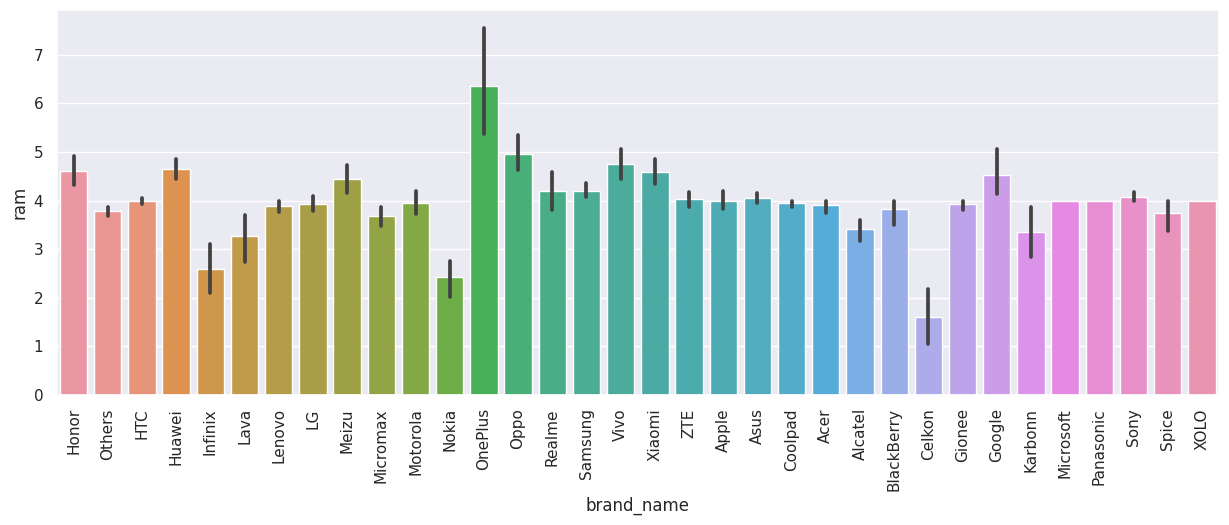

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

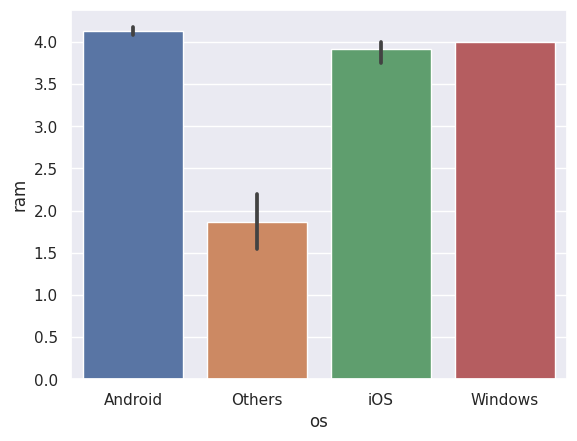

In [ ]:
sns.barplot(data=df,x='os', y='ram' );

In [ ]:
df.groupby('os')['ram'].mean()

os
Android    4.128189
Others     1.861805
Windows    4.000000
iOS        3.916667
Name: ram, dtype: float64

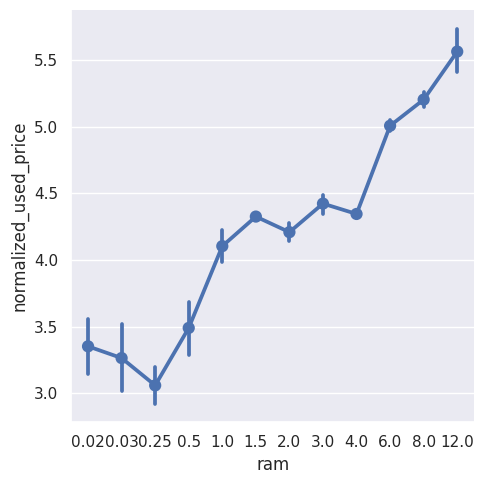

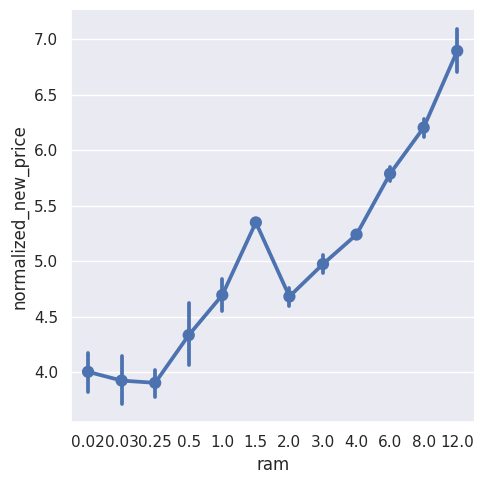

In [ ]:
sns.catplot(data=df,x='ram',y='normalized_used_price',kind='point')
plt.show();
sns.catplot(data=df,x='ram',y='normalized_new_price',kind='point')
plt.show();

* One Plus has the highest average of RAM compared to other brands.
* In the given dataset, Android devices have higher RAM compared to other OS phones.
* With the increase in RAM value, the normalized used/new prices are increased too.

####4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [ ]:
df_large_battery= df[df['battery']>4500].copy()
df_large_battery

brand_name       os  screen_size   4g   5g  main_camera_mp  \
3         Honor  Android     10.04700  yes  yes            13.0   
4         Honor  Android      6.03608  yes   no            13.0   
11        Honor  Android      6.03608  yes   no            13.0   
19        Honor  Android     10.01942  yes   no             5.0   
20        Honor  Android      8.00608  yes   no             8.0   
...         ...      ...          ...  ...  ...             ...   
3420    Samsung  Android      6.09518  yes  yes             8.0   
3421    Samsung  Android      6.09518  yes   no             8.0   
3434    Samsung  Android      6.04396  yes   no            12.0   
3448       Asus  Android      6.59556  yes   no             NaN   
3449       Asus  Android      6.04396  yes   no             NaN   

      selfie_camera_mp  int_memory   ram  battery  weight  release_year  \
3                  8.0        64.0   6.0   7250.0   480.0          2020   
4                  8.0        64.0   3.0   5000.0   185.0          2020   
11                 8.0        64.0   4.0   5000.0   185.0          2020   
19                 2.0        32.0   3.0   5100.0   173.0          2019   
20                 8.0        32.0   3.0   5100.0   173.0          2019   
...                ...         ...   ...      ...     ...           ...   
3420              13.0       128.0  12.0   5000.0   222.0          2020   
3421              13.0       128.0  12.0   5000.0   220.0          2020   
3434              16.0        64.0   4.0   6000.0   188.0          2019   
3448              24.0       128.0   8.0   6000.0   240.0          2019   
3449               8.0        64.0   6.0   5000.0   190.0          2019   

      days_used  normalized_used_price  normalized_new_price  
3           345               5.135387              5.630961  
4           293               4.389995              4.947837  
11          344               4.657383              4.770176  
19          266               4.267878              5.517051  
20          321               4.556295              5.304001  
...         ...                    ...                   ...  
3420        197               5.623042              6.792120  
3421        176               5.594265              6.960775  
3434        455               4.781641              5.109937  
3448        325               5.715316              7.059317  
3449        232               4.492337              6.483872  

[341 rows x 15 columns]

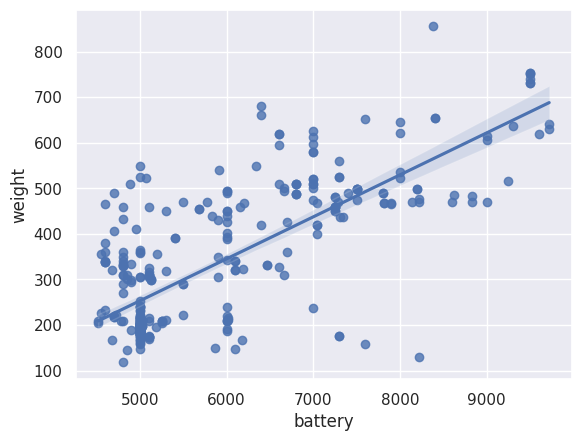

In [ ]:
sns.regplot(data=df_large_battery, y='weight',x='battery');

In [ ]:
df_large_battery.groupby('os')['weight'].count()

os
Android    324
Others       3
iOS         14
Name: weight, dtype: int64

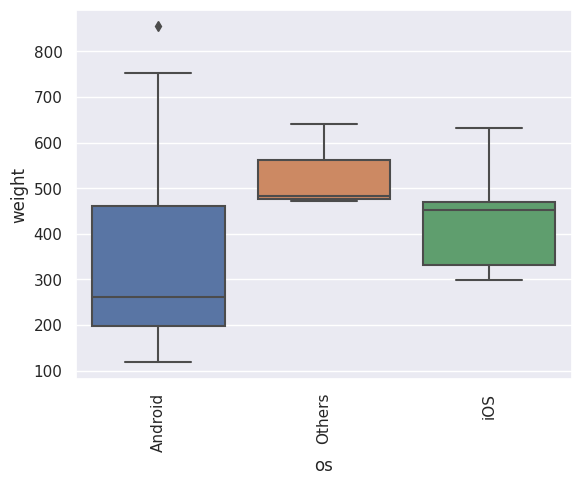

In [ ]:
# weight vs os
sns.boxplot(x="os", y ="weight", data=df_large_battery)
plt.xticks(rotation=90);

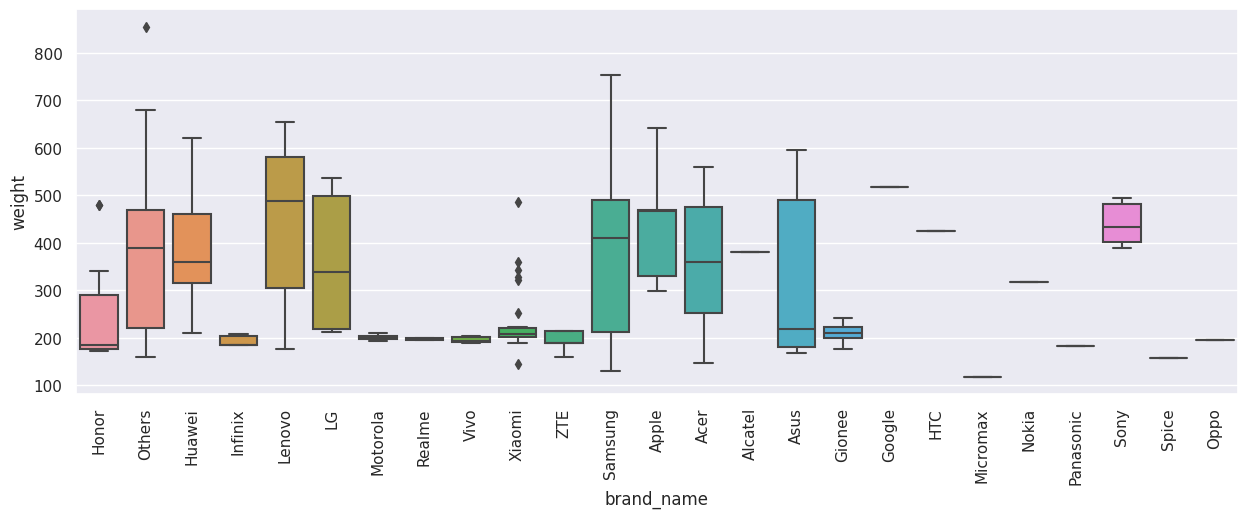

In [ ]:
#weight vs brand_name
plt.figure(figsize=(15, 5))
sns.boxplot(x="brand_name", y ="weight", data=df_large_battery)
plt.xticks(rotation=90);

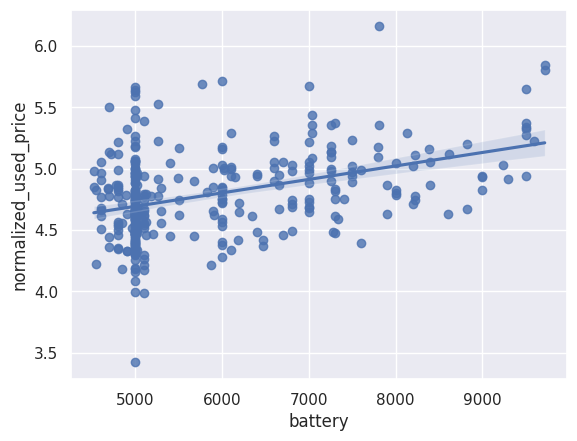

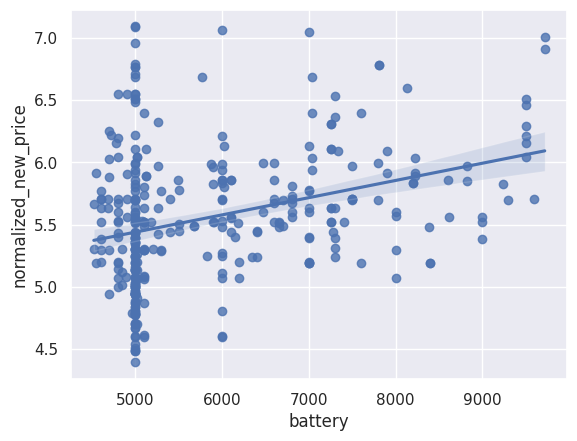

In [ ]:
sns.regplot(data=df_large_battery,x='battery',y='normalized_used_price')
plt.show();
sns.regplot(data=df_large_battery,x='battery',y='normalized_new_price')
plt.show();

* The Samsung brand's most of the devices have large battery(more than 4500 mAh) implying samsung phones are heavier as compared to other brands.
* Phones with larger batteries of more than 4500 mAh mostly fall under the Android devices. There is no Windows OS devices indicating, most of the windows devices have battery lesser than 4500mAh
* From the visuals we can say that, when the battery increases, the weight also increases.

####5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?


In [ ]:
#since our screen size is already in inches lets analyse the screensize larger than 6 inches
df_larger_screensize= df[df['screen_size']>6].copy()

In [ ]:
df_larger_screensize.groupby('brand_name')['screen_size'].count().sort_values(ascending=False)

brand_name
Huawei       157
Samsung      131
Others       118
Vivo          82
Oppo          78
Lenovo        76
Honor         72
Xiaomi        69
LG            63
Asus          51
Motorola      43
Realme        41
Alcatel       34
ZTE           25
Apple         24
Sony          23
Meizu         21
Acer          20
Nokia         19
OnePlus       16
HTC           14
Micromax      11
Infinix       10
Gionee         8
Google         7
XOLO           4
Panasonic      3
Coolpad        3
Karbonn        2
Spice          2
Microsoft      1
Name: screen_size, dtype: int64

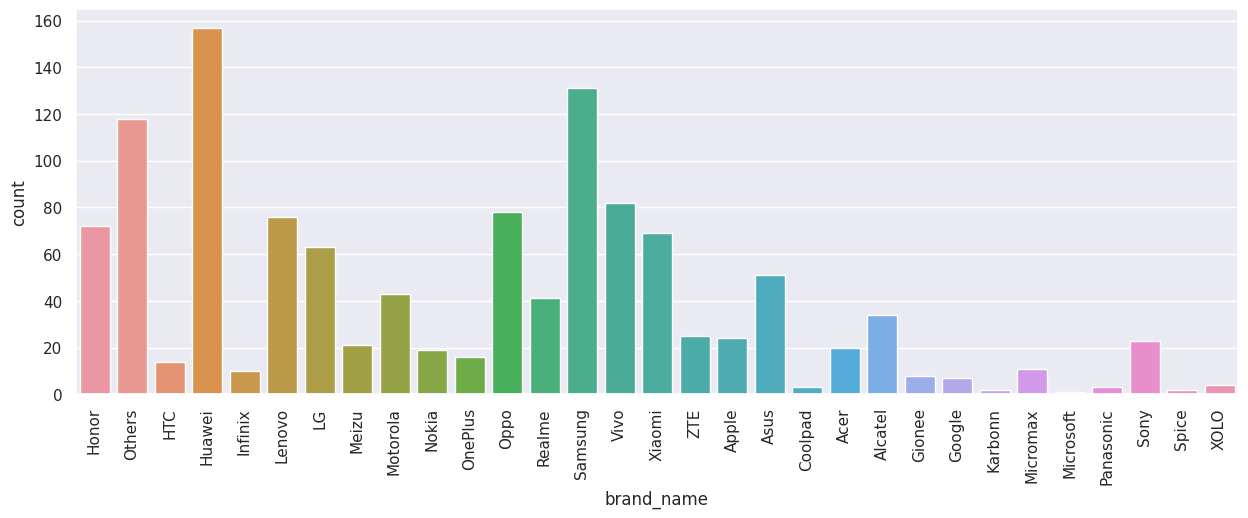

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df_larger_screensize,x='brand_name')
plt.xticks(rotation=90);

In [ ]:
import warnings
with warnings.catch_warnings():
      warnings.simplefilter("ignore")
      print(df_larger_screensize.groupby(['brand_name','os'],as_index=False)['normalized_used_price','screen_size'].mean().sort_values(by='screen_size',ascending=False).head())

   brand_name       os  normalized_used_price  screen_size
4       Apple   Others               5.581025    11.045133
19  Microsoft  Windows               5.230574    10.066700
1        Acer   Others               5.066007     9.077760
5       Apple      iOS               5.103794     8.735543
31      Spice  Android               4.366662     8.506460


In [ ]:
import warnings
with warnings.catch_warnings():
      warnings.simplefilter("ignore")
      print(df_larger_screensize.groupby(['brand_name','os'],as_index=False)['normalized_new_price','screen_size'].mean().sort_values(by=['screen_size'],ascending=False).head())

   brand_name       os  normalized_new_price  screen_size
4       Apple   Others              6.481287    11.045133
19  Microsoft  Windows              5.802753    10.066700
1        Acer   Others              5.793989     9.077760
5       Apple      iOS              6.366617     8.735543
31      Spice  Android              4.989844     8.506460


* Huawei and Samsung brand phones have generally larger screen size.
* Apple and Microsoft phones with a larger screen have higher normalized used/new prices.

####6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

In [ ]:
df_larger_selfie_camera = df[df.selfie_camera_mp > 8]

In [ ]:
df_larger_selfie_camera["brand_name"].value_counts()

Huawei        87
Vivo          78
Oppo          75
Xiaomi        63
Samsung       57
Honor         41
Others        34
LG            32
Motorola      26
Meizu         24
HTC           20
ZTE           20
Realme        18
OnePlus       18
Lenovo        14
Sony          14
Nokia         10
Asus           6
Infinix        4
Gionee         4
Coolpad        3
BlackBerry     2
Micromax       2
Panasonic      2
Acer           1
Name: brand_name, dtype: int64

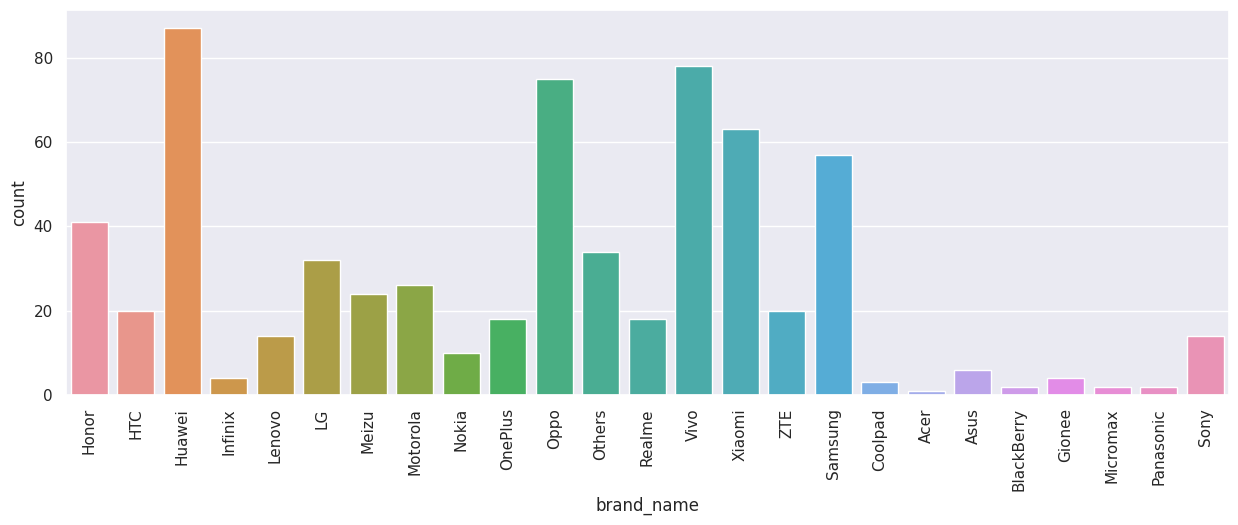

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df_larger_selfie_camera,x='brand_name')
plt.xticks(rotation=90);

In [ ]:
df_larger_selfie_camera["os"].value_counts(normalize=True)

Android    0.996947
Others     0.003053
Name: os, dtype: float64

In [ ]:
df_larger_selfie_camera.groupby(['brand_name','os'])['normalized_used_price'].mean().sort_values(ascending=False).head()

brand_name  os     
OnePlus     Android    5.265559
Huawei      Android    5.112688
Oppo        Android    5.061356
Samsung     Android    5.043860
Xiaomi      Android    4.997830
Name: normalized_used_price, dtype: float64

In [ ]:
df_larger_selfie_camera.groupby(['brand_name','os'])['normalized_new_price'].mean().sort_values(ascending=False).head()

brand_name  os     
OnePlus     Android    6.392378
Oppo        Android    5.986220
Huawei      Android    5.972479
Samsung     Android    5.945073
LG          Android    5.892732
Name: normalized_new_price, dtype: float64

* Huawei, Vivo and Oppo are the brands with higher count of used phones with larger selfie camera comparatively.
* Also , Most of the phones with larger selfie camera are Android phones.
* Oneplus has the higher normalized new/used prices with respect to the larger selfie camera followed by Oppo, Huawei and Samsung.

####7. Which attributes are highly correlated with the normalized price of a used device?

In [ ]:
import warnings
with warnings.catch_warnings():
      warnings.simplefilter("ignore")
      correlations = df.corr()['normalized_used_price']
      print(correlations)

screen_size              0.614785
main_camera_mp           0.587302
selfie_camera_mp         0.608074
int_memory               0.190993
ram                      0.520289
battery                  0.613619
weight                   0.382354
release_year             0.509790
days_used               -0.358264
normalized_used_price    1.000000
normalized_new_price     0.834496
Name: normalized_used_price, dtype: float64


Observations:
* Screen size has a strong positive correlation of 0.615 with normalized used price.
* Main camera megapixels show a substantial positive correlation of 0.587 with normalized used price.
* Selfie camera megapixels are also positively correlated with a value of 0.608.
* Internal memory exhibits a positive but relatively weaker correlation of 0.191.
* RAM is positively correlated with a moderate strength of 0.520.
* Battery capacity demonstrates a strong positive correlation of 0.614.
* Weight has a positive correlation of 0.382.
* Release year shows a moderate positive correlation of 0.510.
* The number of days a device has been used has a negative correlation of -0.358 with normalized used price.
* The variable "normalized new price" is highly positively correlated with a coefficient of 0.834.

## Data Preprocessing

#### Missing value treatment

In [ ]:
df_copy=df.copy()

In [ ]:
df_copy.isna().sum().sort_values(ascending=False)

main_camera_mp           179
weight                     7
battery                    6
int_memory                 4
ram                        4
selfie_camera_mp           2
brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
#df.groupby(['brand_name','release_year'])['main_camera_mp'].median()
impute_columns_na=['main_camera_mp','weight','battery','int_memory','ram','selfie_camera_mp']

for col in impute_columns_na:
    df_copy[col] = df_copy[col].fillna(value=df_copy.groupby(['brand_name','release_year'])[col].transform("median"))
    print(col)


main_camera_mp
weight
battery
int_memory
ram
selfie_camera_mp


In [ ]:
df_copy.isna().sum().sort_values(ascending=False)

main_camera_mp           179
weight                     7
battery                    6
selfie_camera_mp           2
brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
int_memory                 0
ram                        0
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
impute_columns_na=['main_camera_mp','weight','battery','selfie_camera_mp']

for col in impute_columns_na:
    df_copy[col] = df_copy[col].fillna(value=df_copy.groupby('brand_name')[col].transform("median"))
    print(col)

main_camera_mp
weight
battery
selfie_camera_mp


In [ ]:
df_copy.isna().sum().sort_values(ascending=False)

main_camera_mp           10
brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [ ]:
df_copy["main_camera_mp"] = df_copy["main_camera_mp"].fillna(df_copy["main_camera_mp"].median())

In [ ]:
df_copy.isna().sum().sort_values(ascending=False)

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

We have imputed the missing values in the columns with median of the columns grouped by release year and brand name.Now we have no more missing values.

####Feature engineering

We'll generate a new column named "years_since_release" based on the "release_year" column. The year of data collection, which is 2021, will serve as the reference point since the data was collected in that year. As a result, we'll remove the "release_year" column from the dataset.

In [ ]:
df_copy['year_since_release'] = df_copy['release_year'].apply(lambda x: 2021 - x)


In [ ]:
df_copy.drop(['release_year'],axis=1,inplace=True) ##Dropping column for release year.
df_copy.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android      5.71300  yes   no            13.0   
1      Honor  Android      6.81620  yes  yes            13.0   
2      Honor  Android      6.57586  yes  yes            13.0   
3      Honor  Android     10.04700  yes  yes            13.0   
4      Honor  Android      6.03608  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_used_price  normalized_new_price  year_since_release  
0               4.307572              4.715100                   1  
1               5.162097              5.519018                   1  
2               5.111084              5.884631                   1  
3               5.135387              5.630961                   1  
4               4.389995              4.947837                   1


####Outlier detection and treatment

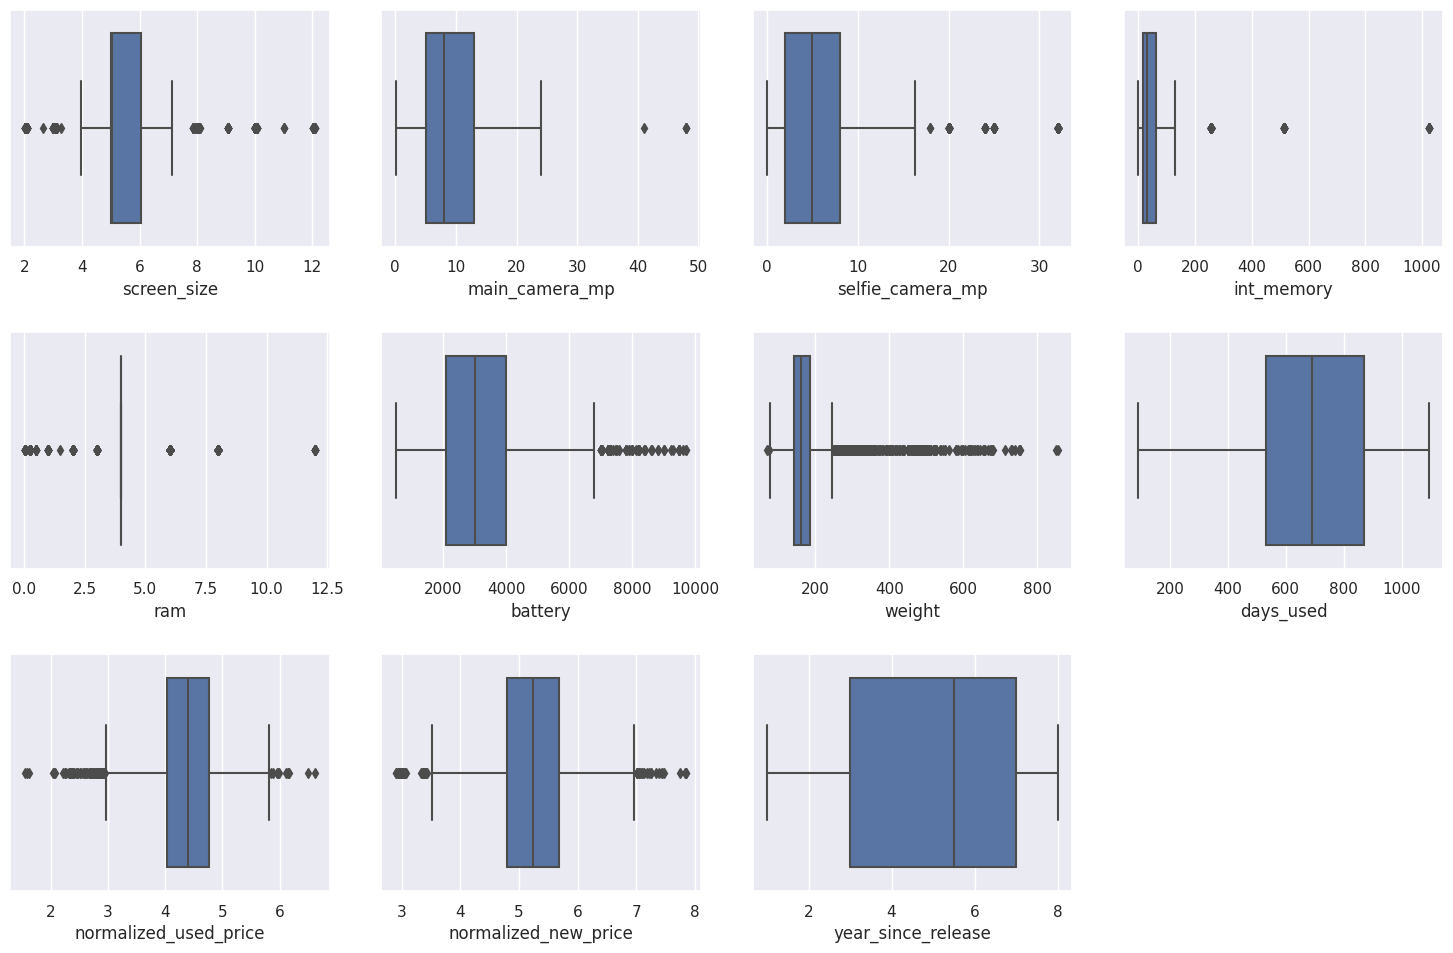

In [ ]:
# outlier detection using boxplot
num_cols = df_copy.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))
##For loop iterating box plots with columns that are only numeric.
for i, variable in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df_copy, x=variable)
    plt.tight_layout(pad=2)

plt.show()

In [ ]:
#Checking the values of outliers if anything unusual
for column_data in num_cols:
  print(column_data)
  Q1 = np.percentile(df_copy[column_data], 25)
  Q3 = np.percentile(df_copy[column_data], 75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = [value for value in df_copy[column_data] if value < lower_bound or value > upper_bound]
  print("Outliers:", outliers)

screen_size
Outliers: [10.047, 10.01942, 8.00608, 8.00608, 8.00608, 10.047, 10.086400000000001, 10.086400000000001, 10.086400000000001, 8.045480000000001, 8.045480000000001, 10.01942, 10.01942, 8.00608, 8.00608, 10.01942, 2.0803200000000004, 10.01942, 3.0022800000000003, 3.0535, 3.0535, 2.04092, 2.04092, 2.04092, 2.04092, 8.00608, 7.9272800000000005, 10.047, 10.01942, 8.00608, 8.00608, 8.00608, 10.047, 10.086400000000001, 10.086400000000001, 10.086400000000001, 8.045480000000001, 8.045480000000001, 10.01942, 10.01942, 8.00608, 8.00608, 10.01942, 2.0803200000000004, 10.01942, 3.0022800000000003, 3.0535, 3.0535, 2.04092, 2.04092, 2.04092, 2.04092, 10.047, 10.05882, 10.01942, 10.05882, 8.00608, 8.00608, 8.00608, 10.01942, 8.00608, 8.00608, 8.0967, 12.09974, 11.008360000000001, 10.0273, 11.008360000000001, 10.01942, 10.01942, 2.04092, 8.00608, 8.00608, 8.00608, 9.07776, 10.01942, 8.00608, 10.01942, 8.00608, 8.00608, 3.0535, 10.01942, 3.0535, 10.01942, 8.00608, 9.065940000000001, 3.0535, 3.

In [ ]:
df_copy['screen_size']=round(df_copy['screen_size'],4)
df_copy.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android       5.7130  yes   no            13.0   
1      Honor  Android       6.8162  yes  yes            13.0   
2      Honor  Android       6.5759  yes  yes            13.0   
3      Honor  Android      10.0470  yes  yes            13.0   
4      Honor  Android       6.0361  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_used_price  normalized_new_price  year_since_release  
0               4.307572              4.715100                   1  
1               5.162097              5.519018                   1  
2               5.111084              5.884631                   1  
3               5.135387              5.630961                   1  
4               4.389995              4.947837                   1

Observations: Given the fast-paced nature of the mobile phones industry and the lack of domain knowledge, that the outliers remain untreated. Also due to the diversity of branded phones could be the reason for the outliers

#### Preparing data for modeling

* We want to predict the **normalized price of used devices**
* Before we proceed to build a model, we'll have to encode categorical features
* We'll split the data into train and test to be able to evaluate the model that we build on the train data
* We will build a Linear Regression model using the train data and then check it's performance

In [ ]:
# defining X and y variables
X = df_copy.drop(['normalized_used_price'], axis=1)
y = df_copy['normalized_used_price']

In [ ]:
X.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android       5.7130  yes   no            13.0   
1      Honor  Android       6.8162  yes  yes            13.0   
2      Honor  Android       6.5759  yes  yes            13.0   
3      Honor  Android      10.0470  yes  yes            13.0   
4      Honor  Android       6.0361  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  year_since_release  
0              4.715100                   1  
1              5.519018                   1  
2              5.884631                   1  
3              5.630961                   1  
4              4.947837                   1

In [ ]:
y.head()

0    4.307572
1    5.162097
2    5.111084
3    5.135387
4    4.389995
Name: normalized_used_price, dtype: float64

In [ ]:
# let's add the intercept to data
X = sm.add_constant(X)

In [ ]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  \
0    1.0       5.7130            13.0               5.0        64.0  3.0   
1    1.0       6.8162            13.0              16.0       128.0  8.0   
2    1.0       6.5759            13.0               8.0       128.0  8.0   
3    1.0      10.0470            13.0               8.0        64.0  6.0   
4    1.0       6.0361            13.0               8.0        64.0  3.0   

   battery  weight  days_used  normalized_new_price  ...  brand_name_Spice  \
0   3020.0   146.0        127              4.715100  ...                 0   
1   4300.0   213.0        325              5.519018  ...                 0   
2   4200.0   213.0        162              5.884631  ...                 0   
3   7250.0   480.0        345              5.630961  ...                 0   
4   5000.0   185.0        293              4.947837  ...                 0   

   brand_name_Vivo  brand_name_XOLO  brand_name_Xiaomi  brand_name_ZTE  \
0                0                0                  0               0   
1                0                0                  0               0   
2                0                0                  0               0   
3                0                0                  0               0   
4                0                0                  0               0   

   os_Others  os_Windows  os_iOS  4g_yes  5g_yes  
0          0           0       0       1       0  
1          0           0       0       1       1  
2          0           0       0       1       1  
3          0           0       0       1       1  
4          0           0       0       1       0  

[5 rows x 49 columns]

In [ ]:
#splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## EDA after manipualation:

In [ ]:
# check the statistical summary once again
df_copy.describe(include="all").T

count unique      top  freq         mean          std  \
brand_name               3454     34   Others   502          NaN          NaN   
os                       3454      4  Android  3214          NaN          NaN   
screen_size            3454.0    NaN      NaN   NaN      5.40297     1.499281   
4g                       3454      2      yes  2335          NaN          NaN   
5g                       3454      2       no  3302          NaN          NaN   
main_camera_mp         3454.0    NaN      NaN   NaN     9.617597     4.749438   
selfie_camera_mp       3454.0    NaN      NaN   NaN     6.555067      6.96844   
int_memory             3454.0    NaN      NaN   NaN    54.528474    84.934991   
ram                    3454.0    NaN      NaN   NaN      4.03262     1.368598   
battery                3454.0    NaN      NaN   NaN  3132.577446  1298.884193   
weight                 3454.0    NaN      NaN   NaN   182.636856    88.360445   
days_used              3454.0    NaN      NaN   NaN   674.869716   248.580166   
normalized_used_price  3454.0    NaN      NaN   NaN     4.364712     0.588914   
normalized_new_price   3454.0    NaN      NaN   NaN     5.233107     0.683637   
year_since_release     3454.0    NaN      NaN   NaN     5.034742     2.298455   

                            min       25%       50%       75%       max  
brand_name                  NaN       NaN       NaN       NaN       NaN  
os                          NaN       NaN       NaN       NaN       NaN  
screen_size              2.0015    5.0038     5.055     6.044   12.0997  
4g                          NaN       NaN       NaN       NaN       NaN  
5g                          NaN       NaN       NaN       NaN       NaN  
main_camera_mp             0.08       5.0       8.0      13.0      48.0  
selfie_camera_mp            0.0       2.0       5.0       8.0      32.0  
int_memory                 0.01      16.0      32.0      64.0    1024.0  
ram                        0.02       4.0       4.0       4.0      12.0  
battery                   500.0    2100.0    3000.0    4000.0    9720.0  
weight                     69.0     142.0     160.0     185.0     855.0  
days_used                  91.0     533.5     690.5    868.75    1094.0  
normalized_used_price  1.536867  4.033931  4.405133    4.7557  6.619433  
normalized_new_price   2.901422  4.790342  5.245892  5.673718  7.847841  
year_since_release          1.0       3.0       5.5       7.0       8.0

In [ ]:
# check df_copy has no missing values as required
df_copy.isnull().sum().sum()

0

In [ ]:
# take a look at how df_copy data looks like now
df_copy.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android       5.7130  yes   no            13.0   
1      Honor  Android       6.8162  yes  yes            13.0   
2      Honor  Android       6.5759  yes  yes            13.0   
3      Honor  Android      10.0470  yes  yes            13.0   
4      Honor  Android       6.0361  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_used_price  normalized_new_price  year_since_release  
0               4.307572              4.715100                   1  
1               5.162097              5.519018                   1  
2               5.111084              5.884631                   1  
3               5.135387              5.630961                   1  
4               4.389995              4.947837                   1

Reanalysing the data and its corelations using the heat map.

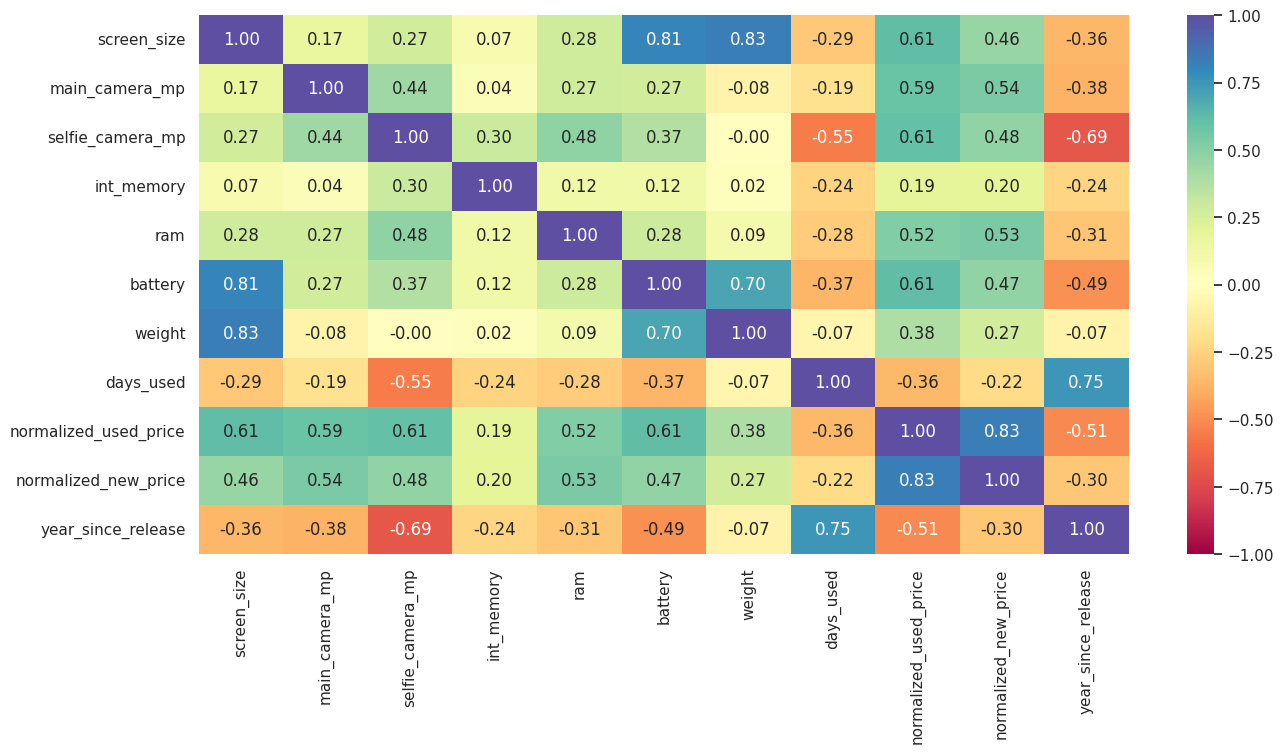

In [ ]:
cols_list = df_copy.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 7))
sns.heatmap(
    df_copy[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Since we treated the missing values from the main camera mp, weight,battery,int_memory,ram,selfie_camera_mp. Lets compare those columns corelation up close!

In [ ]:
import warnings

def correlation_difference(df1, df2, column):
    with warnings.catch_warnings():
      warnings.simplefilter("ignore")
      corr_df1 = df1.corr()[column]['normalized_used_price']
      corr_df2 = df2.corr()[column]['normalized_used_price']
      return corr_df2 - corr_df1

# List of columns for which we want to find the difference in correlation
columns_of_interest = ['main_camera_mp','weight','battery','int_memory','ram','selfie_camera_mp']

# Iterate through the columns and find the difference in correlation
for column in columns_of_interest:
    corr_difference = correlation_difference(df, df_copy, column)
    print(f'Difference in correlation for {column}: {corr_difference}')

Difference in correlation for main_camera_mp: 0.0035514487429980646
Difference in correlation for weight: 0.00047393911069271155
Difference in correlation for battery: -0.0006238496439605612
Difference in correlation for int_memory: 0.00042424559128492745
Difference in correlation for ram: 0.0020348681580959482
Difference in correlation for selfie_camera_mp: -0.00024793185733473777


Observations:
The differences in correlation values between the original and modified datasets reflect the impact of data preprocessing and handling missing values:

* For "main_camera_mp," the correlation slightly increased in the modified dataset, with a difference of approximately 0.0036.

* "Weight" also saw a minor increase in correlation (approximately 0.0005) in the modified dataset.

* "Battery" showed a slight decrease in correlation (around -0.0006) in the modified dataset.

* "Int_memory" displayed a small increase in correlation (approximately 0.0004) in the modified dataset.

* "Ram" exhibited a notable increase in correlation (about 0.0020) in the modified dataset, suggesting a more significant relationship.

* "Selfie_camera_mp" saw a slight decrease in correlation (around -0.0002) in the modified dataset.

## Model Building - Linear Regression

In [ ]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Fri, 13 Oct 2023   Prob (F-statistic):               0.00
Time:                           12:55:53   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Interpreting the Regression Results:

In [ ]:
coefficients = olsmodel.params
print(coefficients)

intercept = olsmodel.params['const']

const                    1.315626
screen_size              0.061937
main_camera_mp           0.020825
selfie_camera_mp         0.013492
int_memory               0.000115
ram                      0.022952
battery                 -0.000017
weight                   0.000998
days_used                0.000042
normalized_new_price     0.431086
year_since_release      -0.023664
brand_name_Alcatel       0.015367
brand_name_Apple        -0.003779
brand_name_Asus          0.015064
brand_name_BlackBerry   -0.030010
brand_name_Celkon       -0.046819
brand_name_Coolpad       0.020910
brand_name_Gionee        0.044761
brand_name_Google       -0.032612
brand_name_HTC          -0.013036
brand_name_Honor         0.031650
brand_name_Huawei       -0.002034
brand_name_Infinix       0.163311
brand_name_Karbonn       0.094275
brand_name_LG           -0.013176
brand_name_Lava          0.033192
brand_name_Lenovo        0.045381
brand_name_Meizu        -0.012878
brand_name_Micromax     -0.033699
brand_name_Mic

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for adj. R-squared is **0.0.842**, which is good.


2. ***const* coefficient**: It is the Y-intercept.
    - It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.
    - In our case, the value for `const` coefficient is **1.3156**.

3. **Coefficient of a predictor variable**: Coefficent of the normalized new price is **0.4311** . This would greatly affect the final normalized used price of phone/tablet.

4. **std err**: It reflects the level of accuracy of the coefficients.
    - The lower it is, the higher is the level of accuracy.


5. **P>|t|**: It is p-value.
   
    * For each independent feature, there is a null hypothesis and an alternate hypothesis. Here 𝛽_i is the coefficient of the i^th independent variable.

        >$ H_0 $ : Independent feature is not significant ( 𝛽_i = 0)

        >$ H_a $ : Independent feature is that it is significant ( 𝛽_i != 0)

    * (P>|t|) gives the p-value for each independent feature to check that null hypothesis. We are considering 0.05 (5%) as significance level.
        
        - A p-value of less than 0.05 is considered to be statistically significant.


6. **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

## Model Performance Check

Let's check the performance of the model using different metrics.

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared     MAPE
0  0.229884  0.180326   0.844886        0.841675  4.32684

In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.238358  0.184749   0.842479        0.834659  4.501651

**Observations**

- The training $R^2$ is 0.844886, so the model is not underfitting

- The train and test RMSE and MAE are comparable, so the model is not overfitting either

- MAE suggests that the model can predict normalized used price within a mean error of 0.1847 on the test data

- MAPE of 4.5 on the test data means that we are able to predict within 4.5% of the normalized used price

## Checking Linear Regression Assumptions

In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied. We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

Let's define a function to check VIF.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(x_train)

feature         VIF
0                   const  227.744092
1             screen_size    7.677282
2          main_camera_mp    2.285050
3        selfie_camera_mp    2.812473
4              int_memory    1.364152
5                     ram    2.282352
6                 battery    4.081779
7                  weight    6.396722
8               days_used    2.660270
9    normalized_new_price    3.119431
10     year_since_release    4.899012
11     brand_name_Alcatel    3.405693
12       brand_name_Apple   13.057669
13        brand_name_Asus    3.332038
14  brand_name_BlackBerry    1.632378
15      brand_name_Celkon    1.774721
16     brand_name_Coolpad    1.468006
17      brand_name_Gionee    1.951271
18      brand_name_Google    1.321778
19         brand_name_HTC    3.410360
20       brand_name_Honor    3.340687
21      brand_name_Huawei    5.983852
22     brand_name_Infinix    1.283955
23     brand_name_Karbonn    1.573702
24          brand_name_LG    4.849830
25        brand_name_Lava    1.711360
26      brand_name_Lenovo    4.558940
27       brand_name_Meizu    2.179607
28    brand_name_Micromax    3.363521
29   brand_name_Microsoft    1.869751
30    brand_name_Motorola    3.274557
31       brand_name_Nokia    3.479849
32     brand_name_OnePlus    1.437034
33        brand_name_Oppo    3.971192
34      brand_name_Others    9.711032
35   brand_name_Panasonic    2.105703
36      brand_name_Realme    1.946811
37     brand_name_Samsung    7.539864
38        brand_name_Sony    2.943160
39       brand_name_Spice    1.688863
40        brand_name_Vivo    3.651437
41        brand_name_XOLO    2.138070
42      brand_name_Xiaomi    3.719689
43         brand_name_ZTE    3.797581
44              os_Others    1.859866
45             os_Windows    1.596034
46                 os_iOS   11.784685
47                 4g_yes    2.467681
48                 5g_yes    1.813900

* There are multiple columns(weight and screensize) with high VIF values, indicating presence of
strong multicollinearity
* We will systematically drop numerical columns with VIF > 5
* We will ignore the VIF values for dummy variables and the constant (intercept)

### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_list = ["weight", "screen_size"]

res = treating_multicollinearity(x_train, y_train, col_list)
res

col  Adj. R-squared after_dropping col  RMSE after dropping col
0  screen_size                           0.838381                 0.234703
1       weight                           0.838071                 0.234928

In [ ]:
col_to_drop = "screen_size"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


feature         VIF
0                   const  202.673906
1          main_camera_mp    2.281835
2        selfie_camera_mp    2.809009
3              int_memory    1.362043
4                     ram    2.282350
5                 battery    3.842989
6                  weight    2.993855
7               days_used    2.648929
8    normalized_new_price    3.077650
9      year_since_release    4.730315
10     brand_name_Alcatel    3.405533
11       brand_name_Apple   13.000338
12        brand_name_Asus    3.326698
13  brand_name_BlackBerry    1.631042
14      brand_name_Celkon    1.774528
15     brand_name_Coolpad    1.467719
16      brand_name_Gionee    1.941437
17      brand_name_Google    1.319334
18         brand_name_HTC    3.399980
19       brand_name_Honor    3.340354
20      brand_name_Huawei    5.981046
21     brand_name_Infinix    1.283526
22     brand_name_Karbonn    1.573494
23          brand_name_LG    4.832548
24        brand_name_Lava    1.711092
25      brand_name_Lenovo    4.553789
26       brand_name_Meizu    2.176424
27    brand_name_Micromax    3.358629
28   brand_name_Microsoft    1.868243
29    brand_name_Motorola    3.262356
30       brand_name_Nokia    3.464643
31     brand_name_OnePlus    1.437004
32        brand_name_Oppo    3.965445
33      brand_name_Others    9.652572
34   brand_name_Panasonic    2.104853
35      brand_name_Realme    1.943845
36     brand_name_Samsung    7.523421
37        brand_name_Sony    2.937375
38       brand_name_Spice    1.683302
39        brand_name_Vivo    3.650625
40        brand_name_XOLO    2.137844
41      brand_name_Xiaomi    3.713988
42         brand_name_ZTE    3.788971
43              os_Others    1.625212
44             os_Windows    1.595936
45                 os_iOS   11.678957
46                 4g_yes    2.466915
47                 5g_yes    1.810289

* We have dealt with multicollinearity in the data
* Let's rebuild the model using the updated set of predictors variables

In [ ]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.7
Date:                   Fri, 13 Oct 2023   Prob (F-statistic):               0.00
Time:                           12:55:55   Log-Likelihood:                 97.950
No. Observations:                   2417   AIC:                            -99.90
Df Residuals:                       2369   BIC:                             178.0
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmod1, x_train2, y_train)
olsmodel_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.232361  0.181562   0.841525        0.838313  4.364738

**Observations**

- We can see that adj. R-squared has dropped from 0.841 to 0.838, which shows that the dropped columns did not have much effect on the model
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance

### Dealing with high p-value variables

- Some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'll drop them
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
    - Repeat the above two steps till there are no columns with p-value > 0.05


In [ ]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'year_since_release', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


In [ ]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [ ]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Fri, 13 Oct 2023   Prob (F-statistic):               0.00
Time:                           12:55:56   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.23403  0.182751    0.83924        0.838235  4.395407

In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.241434  0.186649   0.838387        0.836013  4.556349

**Observations**

* Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train3* as the final set of predictor variables and *olsmod2* as the final model to move forward with
* Now adjusted R-squared is 0.838235, i.e., our model is able to explain ~84% of the variance
* The adjusted R-squared in *olsmod1* (where we considered the variables without multicollinearity) was 0.838313
    * This shows that the variables we dropped were not affecting the model
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting

### TEST FOR LINEARITY AND INDEPENDENCE

In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

Actual Values  Fitted Values  Residuals
3026       4.087488       3.867319   0.220169
1525       4.448399       4.602001  -0.153602
1128       4.315353       4.286957   0.028395
3003       4.282068       4.195169   0.086899
2907       4.456438       4.490563  -0.034125

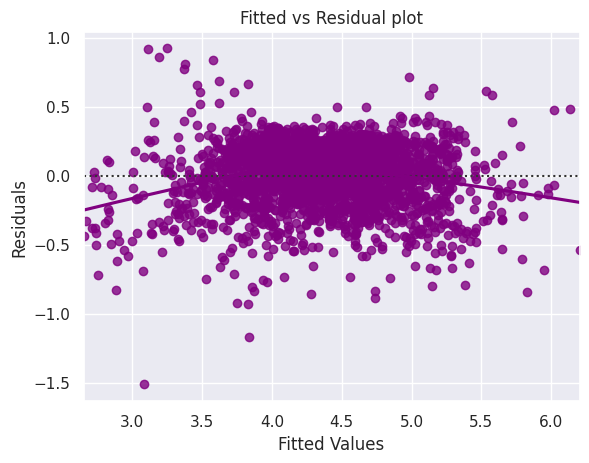

In [ ]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

### TEST FOR NORMALITY

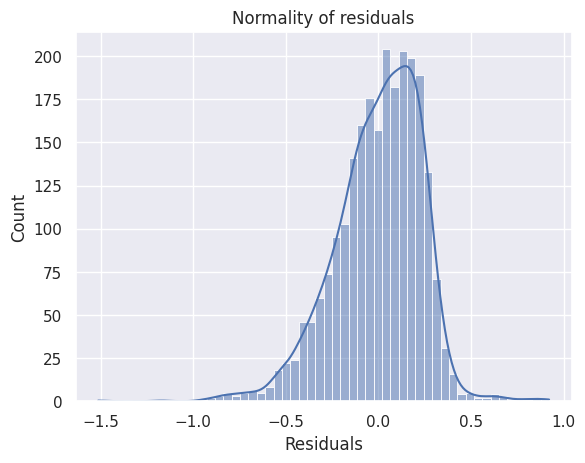

In [ ]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

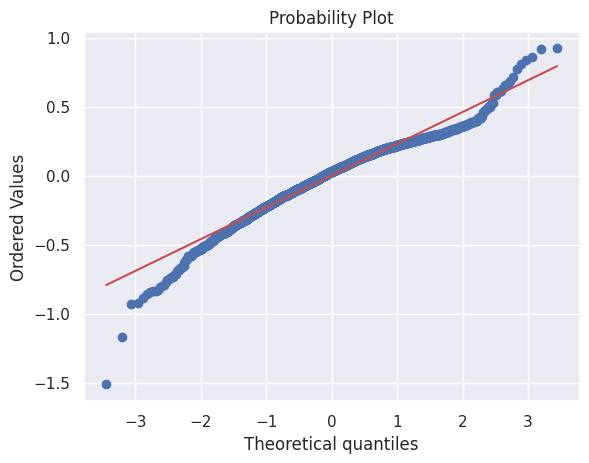

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [ ]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9676972031593323, pvalue=6.995261942370773e-23)

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

### TEST FOR HOMOSCEDASTICITY

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0087504199106758), ('p-value', 0.4401970650667301)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

## Predictions on test data

Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.

In [ ]:
# predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

Actual  Predicted
1995  4.566741   4.385671
2341  3.696103   4.003934
1913  3.592093   3.643812
688   4.306495   4.103463
650   4.522115   5.113026
2291  4.259294   4.398406
40    4.997685   5.459871
1884  3.875359   4.053143
2538  4.206631   4.035868
45    5.380450   5.227899

- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable

## Final Model

Let's recreate the final model and print it's summary to gain insights.

In [ ]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [ ]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Fri, 13 Oct 2023   Prob (F-statistic):               0.00
Time:                           12:55:59   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.23403  0.182751    0.83924        0.838235  4.395407

In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.241434  0.186649   0.838387        0.836013  4.556349

* The model is able to explain ~83.6% of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within 4.55% of the normalized used price

* Hence, we can conclude the model *olsmodel_final* is good for prediction as well as inference purposes

___